# Project Introduction

The main goal is to predict the total number of active e-scooter users from the given. There are 3 main objective to achieve in this project. <br> <br>
1) Data Extraction <br>
2) Exploratory Data Analysis (EDA) <br>
3) End-to-end Machine Learning Pipeline (MLP) <br>

It is required to propose and develop a machine learning pipeline that addresses this problem statement using the given dataset. 

# Exploratory Data Analysis (EDA) 

# Data Overview

Summary: <br>

The extracted dataset from the server provides hourly values for the number of active users for an e-scooter rental service in a city. The features include the date, time, and various weather parameters. The target variable y is the total number of active e-scooter users which is made up of 'guest-users' and 'registered-users' as per the table below. In this portion, we will run some hard codes and see if there are any abnormalities in the dataset before doing exploratory data analysis.



- `date` Date in YYYY-MM-DD.

- `hr` Hour (0 to 23).

- `weather` Description of the weather conditions for that hour.

- `temperature` Average temperature for that hour (Fahrenheit).

- `feels_like_temperature` Average feeling temperature for that hour (Fahrenheit).

- `relative_humidity` Average relative humidity for that hour. The measure of the amount of water in the air (%).

- `windspeed` Average speed of wind for that hour (arbitrary units).

- `psi` Pollutant standard index. The measure of pollutants present in the air (0 to 400).

- `guest_scooter` Number of guest users using the rental e-scooters in that hour.

- `registered_scooter` Number of registered users using the rental e-scooters in that hour.

- `guest_bike` Number of guest users using the rental e-bikes in that hour.

- `registered_bike` Number of registered users using the rental e-bikes in that hour

In [5]:
# Import required library to extract the data from the database
import pandas as pd
import numpy as np
import datetime

In [6]:
# Take a sneak preview on the dataset
data.head()

date  hr weather  temperature  feels_like_temperature  \
0  2012-07-02  23   clear        109.0                   140.0   
1  2011-12-22  10  cloudy         80.2                   109.4   
2  2011-02-25  11   clear         90.4                   120.2   
3  2012-03-10   1   clear         71.8                    95.0   
4  2011-06-19   5  cloudy        102.2                   132.8   

   relative_humidity  windspeed  psi  guest_scooter  registered_scooter  
0               51.0        7.0   13             37                 631  
1               82.0        6.0   35             41                 894  
2               77.0       30.0   30             27                 350  
3               36.0       17.0   40              2                 354  
4               78.0        0.0    1             23                  82

In [7]:
# Basic information on the dataset
print ('Rows\t\t\t:', data.shape[0])
print ('Columns\t\t\t:', data.shape[1])
print ('\nFeatures\t\t:\n', data.columns.tolist())
print ('\nMissing Values\t\t:', data.isnull().sum().values.sum())
print ('\nUnique Values\t\t:\n', data.nunique())
print('\nDuplicated Values\t:\n', data.duplicated().value_counts())

Rows			: 18643
Columns			: 10

Features		:
 ['date', 'hr', 'weather', 'temperature', 'feels_like_temperature', 'relative_humidity', 'windspeed', 'psi', 'guest_scooter', 'registered_scooter']

Missing Values		: 0

Unique Values		:
 date                       731
hr                          24
weather                     12
temperature                 50
feels_like_temperature      65
relative_humidity           89
windspeed                   30
psi                         51
guest_scooter              795
registered_scooter        3548
dtype: int64

Duplicated Values	:
 False    17031
True      1612
dtype: int64


In [8]:
# As there is a time series component, we should check if the dataset is complete
mindate = datetime.datetime(2011, 1, 1)
maxdate = datetime.datetime(2012, 12, 31)
diff = maxdate - mindate
print("Min date :", mindate)
print("Max date :", maxdate)
print("Total no. of days : ", diff)
print("Total no. of hours :", diff*24)

Min date : 2011-01-01 00:00:00
Max date : 2012-12-31 00:00:00
Total no. of days :  730 days, 0:00:00
Total no. of hours : 17520 days, 0:00:00


In [9]:
# Check the data for weather as there are 12 entries 
data['weather'].value_counts()

clear              11627
cloudy              4613
light snow/rain     1455
CLEAR                318
lear                 233
CLOUDY               126
clar                  99
loudy                 74
LIGHT SNOW/RAIN       48
cludy                 32
liht snow/rain        15
heavy snow/rain        3
Name: weather, dtype: int64

In [10]:
# Dataset information on null and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18643 entries, 0 to 18642
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    18643 non-null  object 
 1   hr                      18643 non-null  int64  
 2   weather                 18643 non-null  object 
 3   temperature             18643 non-null  float64
 4   feels_like_temperature  18643 non-null  float64
 5   relative_humidity       18643 non-null  float64
 6   windspeed               18643 non-null  float64
 7   psi                     18643 non-null  int64  
 8   guest_scooter           18643 non-null  int64  
 9   registered_scooter      18643 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.4+ MB


In [11]:
# Checking the statistical values of the dataset for adnormalities
data.describe()

hr   temperature  feels_like_temperature  relative_humidity  \
count  18643.000000  18643.000000            18643.000000       18643.000000   
mean      11.537145     88.433037              117.313608          62.733251   
std        6.924281     16.252200               20.364081          19.315897   
min        0.000000     48.100000               60.800000           0.000000   
25%        6.000000     75.200000              100.400000          48.000000   
50%       12.000000     88.700000              118.400000          63.000000   
75%       18.000000    102.200000              134.600000          78.000000   
max       23.000000    131.000000              179.600000         100.000000   

          windspeed           psi  guest_scooter  registered_scooter  
count  18643.000000  18643.000000   18643.000000        18643.000000  
mean      12.741082     25.142198     106.388940         1074.471383  
std        8.217008     14.442978     147.151664         1055.916934  
min        0.000000      0.000000      -2.000000           -2.000000  
25%        7.000000     13.000000      12.000000          240.000000  
50%       13.000000     25.000000      50.000000          807.000000  
75%       17.000000     38.000000     144.000000         1535.500000  
max       57.000000     50.000000    1099.000000         6203.000000

# Handling Adnormalities

From the overview, we can see a few problems that can be resolved before we start working on EDA.
The problems that can be seen from the overview are;
1. From the data.head(), we can see that the data is not well arranged. This can be resolved by sorting the data according to date and time, which are columns 'date' and 'hr'.
2. We can also see that there are 1,612 duplicated data. These are data that are fully duplicated, as such, we can drop them without concern.
3. Columns 'guest_scooter' and 'registered_scooter' has a minimum of negative 2. It should have a minimum value of 0 as this is the value of people renting e-scooter. To resolve this, we can either change the negative values to 0 or move the whole data up by 2. This is highly likely due to recording errors. In order to be sure, we need to see how the data was recorded. But for this dataset, we will move the data up by 2 as the number of users will either increase or decrease in sequence.
4. There are 12 unique values for the column 'weather'. From further investigation, we can see that there are repeated weather entries such as spelling errors and upper/lower case. We can remove the upper/lower case difference by changing all the entries into the lower case. And we can create a customized function to rectify the spelling errors.
5. From the overview, we can see there are no missing data. But from the data, we can see that there are missing entries within the 2 years period. As the dataset should have 730 days and 17,520 hours but this dataset has 18,643 hours. Deducting the 1,612 duplicates, we have 17,031 hours of data. This means there are 489 missing hours. To train the forecasting machine learning model with time series, we can interpolate the missing data. 

For this portion, we can amend points 1 to 4 for EDA, as we are correcting the mishandled data. As for point 5, we are adding new data, that's why we will only add new data during featured engineering, which is for the machine learning model.

In [12]:
# 1. Sort the dataset according to date followed by hr columns, as the data.head showed us how messy it was
data.sort_values(['date', 'hr'], ascending=[True, True], inplace=True)

In [13]:
# 2. Drop duplicates from dataset as we can see there are 1612 repeated data
data.drop_duplicates(inplace=True)

In [14]:
# 3. Move the data for the 2 columns by 2
data['registered_scooter'] = data['registered_scooter'] + 2
data['guest_scooter'] = data['guest_scooter'] + 2

In [15]:
# 4. Minimizing the weather categories 
data['weather'] = data['weather'].str.lower()
data['weather'].replace(['clar','lear'],['clear', 'clear'], inplace=True)
data['weather'].replace(['loudy','cludy'],['cloudy', 'cloudy'], inplace=True)
data['weather'].replace(['liht snow/rain'],['light snow/rain'], inplace=True)
data['weather'].value_counts()

clear              11195
cloudy              4443
light snow/rain     1390
heavy snow/rain        3
Name: weather, dtype: int64

# Preprocessing

After handling abnormalities, we need to preprocess the dataset. We will not be adding new data such as filling in missing values. But we will translate the current values that we already have into different meaningful information. This will help us to show higher quality data visualization.

1. We need a better index for this dataset, and we will be setting 'date' and 'hr' column together as DateTime index. Using this index, we will be able to use DateTime analysis in our visualization.
2. Once we have a DateTime index, we can create new columns for days of the week, quarter, weekday, day, month, and year. Day, month, and year values are already known but not shown, what we are going to do is to separate it into new columns to ease the plotting of graphs. For days of the week, quarter, and weekday, this is new information that we can analyze.
3. Convert weather into numerical values. Because when we proceed to the last step, it will be dropped during resampling.
4. Due to personal preference, I would rearrange the columns in this dataset by putting the date and time columns together.
5. We need to create a new column target variable y by adding both 'guest_scooter' and 'registered_scooter'.
6. The current dataset we have is in hours. We can create a new dataset into daily, weekly, monthly, quarterly, and annually by taking the mean. This is because hourly data provides too much information for our graphs causing us to look at noise rather than meaningful information. For annual data, the new column of hours, days, months, and quarterly would not make sense. But for this exercise, we will leave it as this is a small dataset.
7. Finally, we will be converting the weather number of daily, weekly, monthly, quarterly, and annually back to text.

In the next section, data visualization, it is better to have more data to work with. Because we can choose to show what we want. When we are training the model, we will remove the redundant information as this information is repeated or represented in a different format. This does not provide any value to our machine learning model but reduces our efficiency.

In [16]:
# 1. Setting date and hr as datetime index
data['date_time'] = data['date'].astype(str) + ' ' + data['hr'].astype(str) + ':00:00'
data['date_time'] = pd.to_datetime(data['date_time'])
data.index = data['date_time']
del data['date_time']

In [17]:
# 2. Translate datetime column into day, month, quarter, and year
data['day'] = data.index.day
data['mth'] = data.index.month
data['qtr'] = data.index.quarter
data['yr'] = data.index.year

# Create new columns of day of week('wkday'), day of week in numbers{'wkday_num'), and is weekday
data['wkday_num'] = data.index.dayofweek
data['is_wkend'] = ((data['wkday_num']) // 5 == 1).astype(float)
data['wkday'] = data.index.day_name()

In [18]:
# 3. Create numerical weather column
def amend_weather_num(row):
    if row == 'clear':
        return 3
    elif row == 'cloudy':
        return 2
    elif row == 'light snow/rain':
        return 1
    elif row == 'heavy snow/rain':
        return 0

data['weather_num'] = data['weather'].apply(amend_weather_num)

In [19]:
# 4. Reading column names
cols = data.columns.tolist()
cols = cols[:2] + cols[-8:] + cols[2:10]

# Rearrange columns
data = data[cols]

In [20]:
# 5. Create target variable y
data['total_users']= data['guest_scooter'] + data['registered_scooter']

In [21]:
# 6. Translating dataset from hours to days, weeks, months, quarters
# Resampled daily dataframe
df_a = data.iloc[:,:-3].resample('d').mean() 
df_b = data.iloc[:,-3:].resample('d').sum() 
data_day = pd.concat([df_a, df_b], axis=1)

# Resampled weekly dataframe
df_a = data.iloc[:,:-3].resample('W').mean() 
df_b = data.iloc[:,-3:].resample('W').sum() 
data_wk = pd.concat([df_a, df_b], axis=1)

# Resampled monthly dataframe
df_a = data.iloc[:,:-3].resample('M').mean() 
df_b = data.iloc[:,-3:].resample('M').sum() 
data_mth = pd.concat([df_a, df_b], axis=1)

# Resampled quarterly dataframe
df_a = data.iloc[:,:-3].resample('Q').mean() 
df_b = data.iloc[:,-3:].resample('Q').sum() 
data_qtr = pd.concat([df_a, df_b], axis=1)

# Resampled annually dataframe
df_a = data.iloc[:,:-3].resample('Y').mean() 
df_b = data.iloc[:,-3:].resample('Y').sum() 
data_yr = pd.concat([df_a, df_b], axis=1)

In [22]:
#7. Convert new dataframe weather from numerical back to string
def amend_weather(row):
    if row <= 1.499999:
        return 'clear'
    elif row <= 2.499999:
        return 'cloudy'
    elif row <= 3.499999:
        return 'light snow/rain'
    else:
        return 'heavy snow/rain'

data_day['weather'] = data_day['weather_num'].apply(amend_weather)
data_wk['weather'] = data_wk['weather_num'].apply(amend_weather)
data_mth['weather'] = data_mth['weather_num'].apply(amend_weather)
data_qtr['weather'] = data_qtr['weather_num'].apply(amend_weather)
data_yr['weather'] = data_yr['weather_num'].apply(amend_weather)

# Visualization

In this portion, we will use the preprocessed data extracted from the server to conduct an EDA. This notebook will present appropriate visualizations and explanations to show the findings as well as their implications. Further explanation will be given after each visualization. 

### As this is an interactive notebook, to participate, please restart and run all the code once more.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
%matplotlib inline

### Pair Plots - Viewing Relationships between Data Variables

For the next 2 charts, we are plotting a pairwise relationship in our dataset. 

1. For the first pair plot, we are categorizing it based on the `'weather'` column with 4 categories. 
2. The categories are the weather condition for the day which are `'clear'`, `'cloudy'`, `'light snow/rain'`, and `'heavy snow/rain'`. This helps us to see how the `'weather'` column impacts the other variables. 
3. From all the charts, we can see a majority of 3 colors slowly expanding outwards. 
4. There are little to almost no red points in each chart for `'heavy snow/rain'` because there are only 3 entries as shown above when we did a unique value count for the `'weather'` column. 
5. The majority of the charts show green points which signify that `'light snow/rain'` has a high relationship with them. These charts are `'temperature'`, `'feels_like_temperature'`, `'relative_humidity'`, `'windspeed'`, `'psi'`, and `'guest_scooter'`. Having mostly green points means that when the `'weather'` is `'light snow/rain'` the mentioned columns are more impacted than when the `'weather'` is `'clear'` or `'cloudy'`. 
6. Interestingly, we can see that `'weather'` has little impact on `'registered_scooter'`. This could be because users who registered are long term users who use these scooters for work. We will look at other charts to confirm if this is true. 

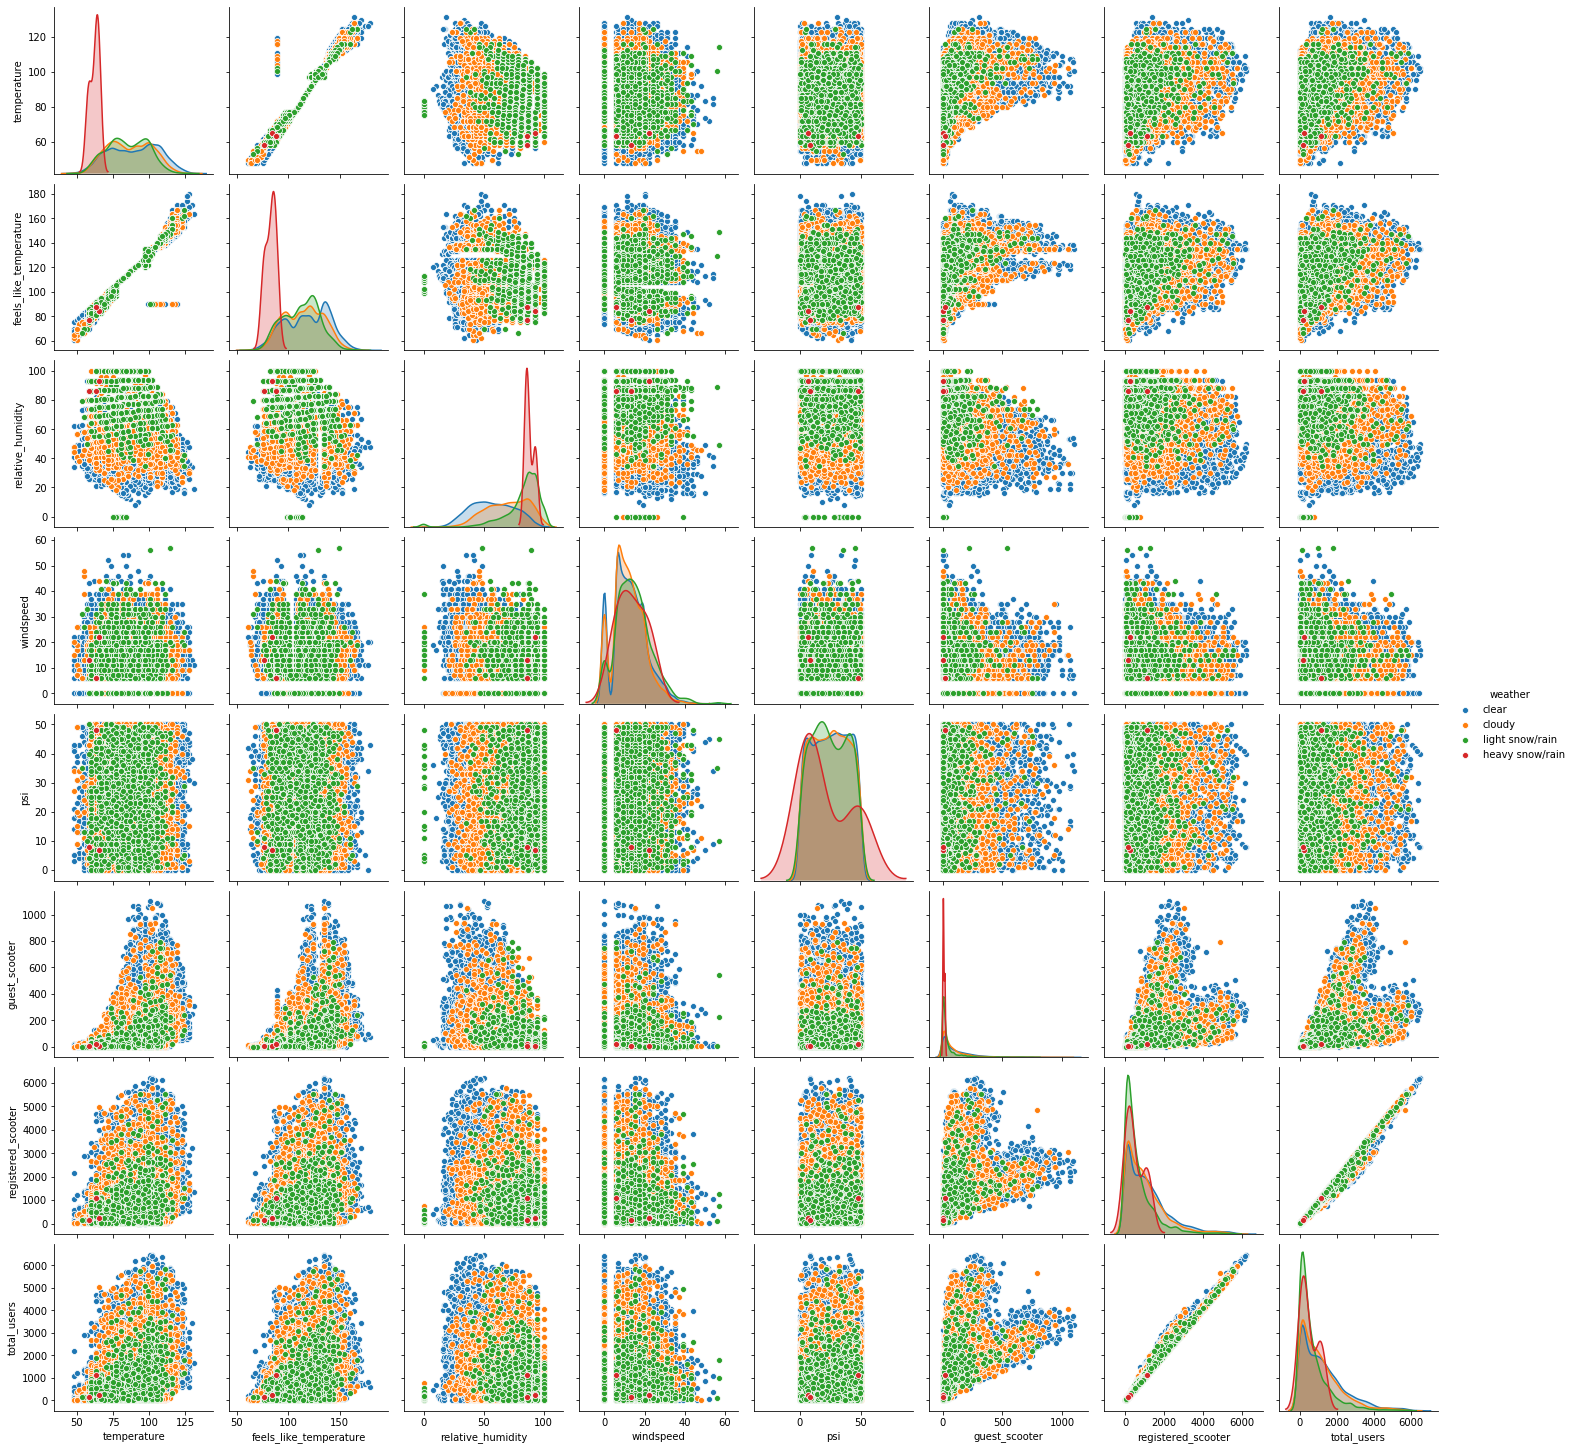

In [24]:
# Run a pairplot to find correlation and how the weather impact this dataset
sns.pairplot(data, hue='weather', 
             vars=['temperature',
                   'feels_like_temperature',
                   'relative_humidity',
                   'windspeed', 'psi', 
                   'guest_scooter',
                   'registered_scooter', 
                   'total_users'], diag_kind='kde');

1. For the second pair plot, we are categorizing it based on the `'wkday'` column with 7 categories. 
2. The categories are days of the weeks, and they are `'Sunday'`, `'Monday'`, `'Tuesday'`, `'Wednesday'`, `'Thursday'`, `'Friday'`, and `'Saturday'`. Like the above pair plot, the following pair plot helps us to see how the 'weather column impact the other variables. 
3. From most of the charts, we can mostly see only pink color except for `'guest_scooter'`. This shows that the days of the week has no impact on weather condition such as `'temperature'`, `'feels_like_temperature'`, `'relative_humidity'`, `'windspeed'`, and `'psi'`. This makes sense as weather condition is not dependent on the days of the week. 
4. But this is what is interesting. Looking at the row or column of `'guest_scooter'`, we can see 3 colors expanding outwards. At the outer ends, we can see shades of orange and blue. It means that guest users are more likely to use the scooters on `'Sunday'` and `'Saturday'` compared with weekdays.
6. And like the above pair plot, `'wkday'` has little impact on `'registered_scooter'`. Similar hypothesis mentioned above, this could be because users who registered are long term users who uses these scooters for work. We will look at other charts for confirmation if this is true. 

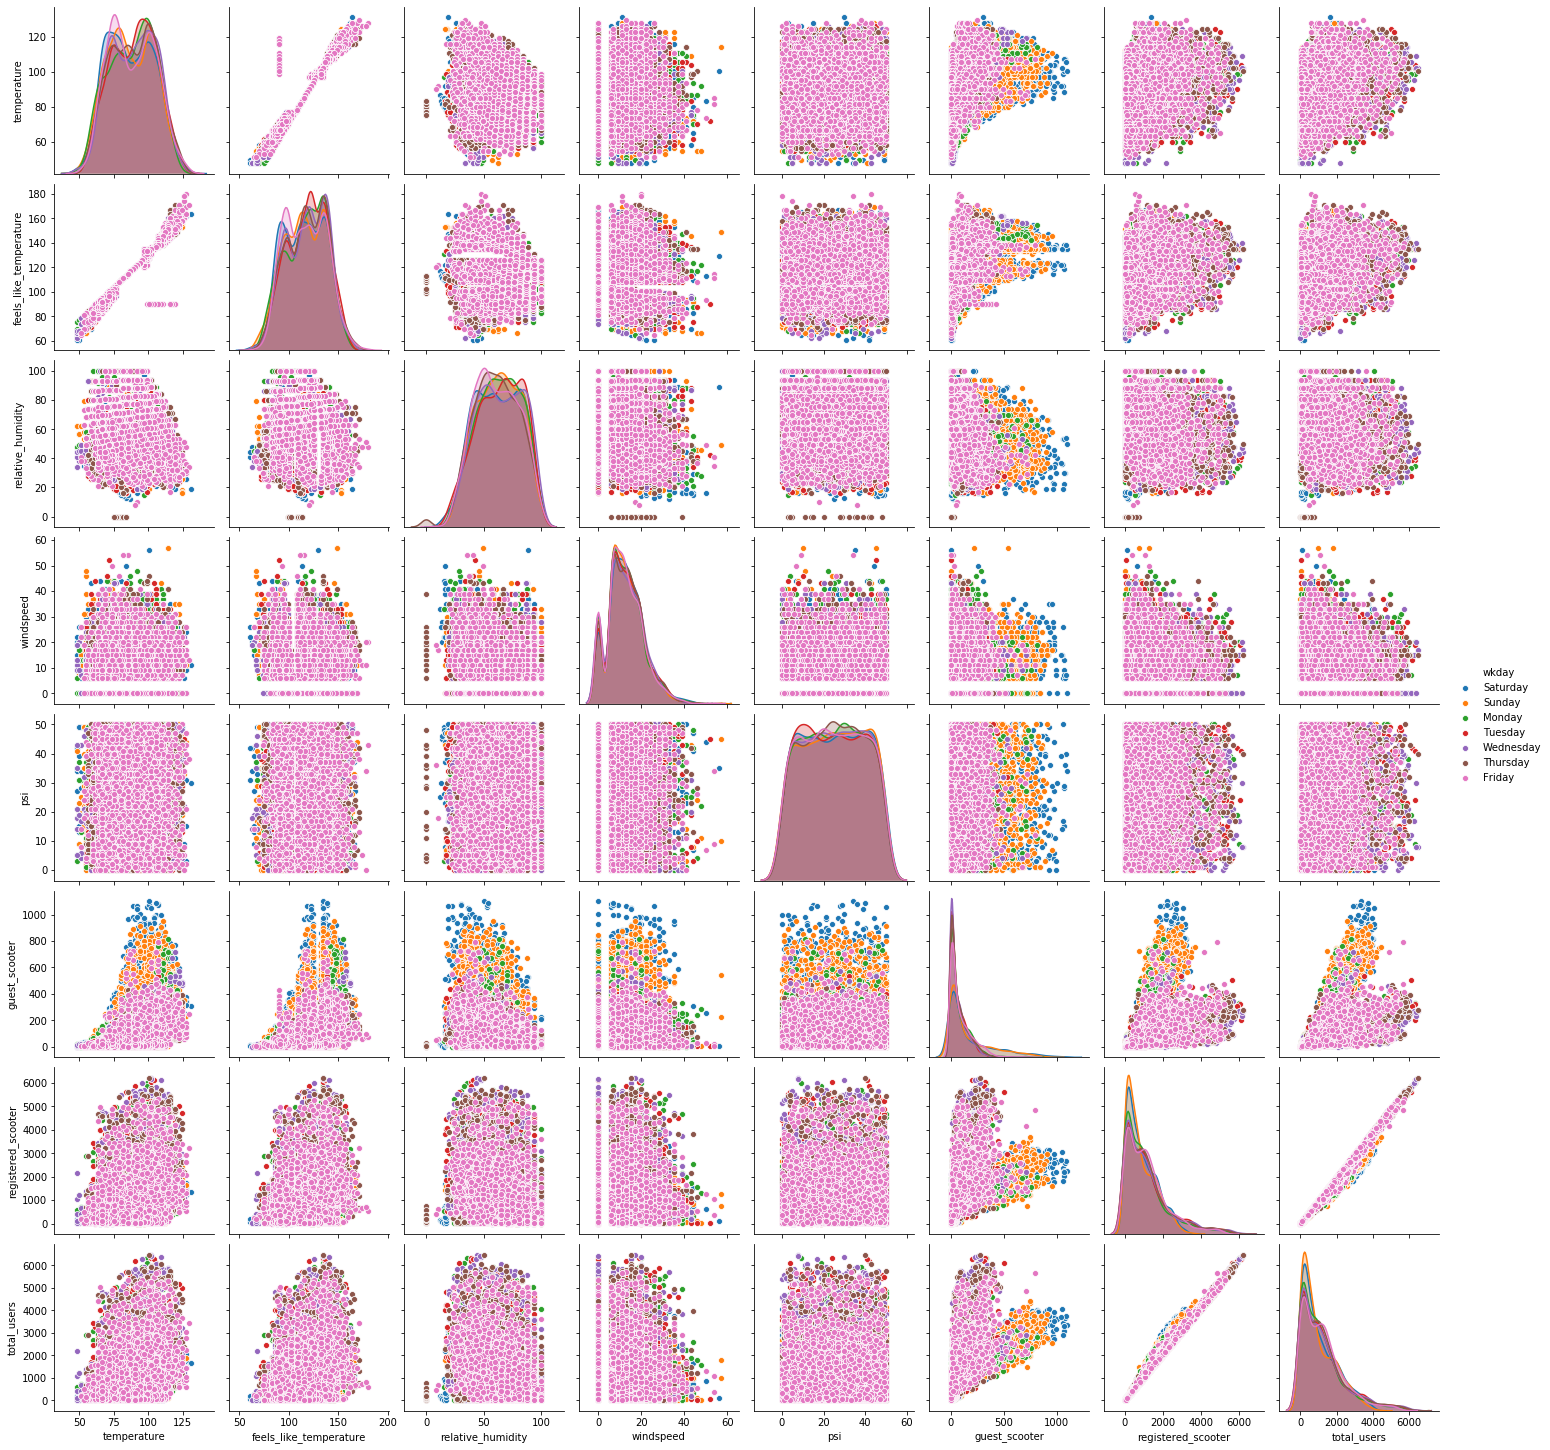

In [25]:
# Run a pairplot to find correlation and how the days of the week impact this dataset
sns.pairplot(data, hue='wkday', 
             vars=['temperature',
                   'feels_like_temperature',
                   'relative_humidity',
                   'windspeed', 'psi', 
                   'guest_scooter',
                   'registered_scooter', 
                   'total_users'], diag_kind='kde');

### Clustermap - Hierarchy Relationships

Here we take a look at a clustermap by plotting a matrix dataset as a hierarchically-clustered heatmap and to see the numerical values of correlation between variables. Plotting a hierarchically-clustered heatmap can help us to group variables into the small family nucleus and how these nucleus relate to one another. From the length of the branch, we can see how strongly related are they to one another. 

1. Individually, we can see that `'registered_scooter'` is highly correlated to `'total_users'`, it is because `'registered_scooter'` has contributed mainly to `'total_users'`. `'guest_scooter'` is also highly correlated to `'total_users'` but not as high as `'registered_scooter'`.
2. `'temperature'` and `'feels_like_temperature'` is also highly correlated, even these 2 columns correlation to other variables are similar. Therefore we will remove one of these columns during featured engineering. Interestingly, both of this column is not well correlated with `'weather_num'`, `'relative_humidity'`, `'windspeed'`, and `'psi'`. However it is nice to see that `'temperature'` and `'feels_like_temperature'` are well correlated with our target variables `'guest_scooter'`, `'registered_scooter'`, and `'total_users'`.
3. `'mth'` and `'qtr'` are highly correlated as well, since they are both values derived from the date index. Similarly, `'is_wkend'` and `'wkday_num'` are highly correlated as well. 
4. `'psi'` is not correlated positively or negatively with any variables, but we will not be removing this column. Because even if `'psi'` is not correlated with other variables, our model may perform well by using `'psi'`.
5. We can also confirm here that `'guest_scooter'` performs better when the weather condition improves. As `'guest_scooter'` is positively correlated with `'weather_num'`, `'windspeed'`, and especially `'temperature'` and `'feels_like_temperature'`. This also confirms our observation from the previous plots, that `'guest_scooter'` is more correlated with weather condition such as `'weather_num'`, `'windspeed'`, `'temperature'` and `'feels_like_temperature'` compared with `'registered_scooter'`. 
6. And `'registered_scooter'` is more correlated with time such as `'hr'`, `'mth'`, and `'qtr'` compared with `'guest_scooter'`. 

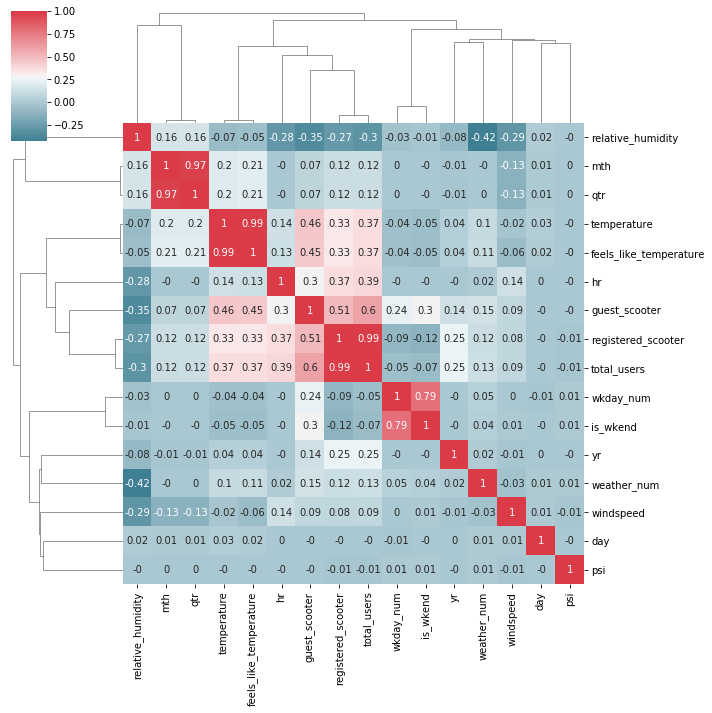

In [26]:
# Plotting clustermap and correlation
corr = data.corr(method='pearson')
sns.clustermap(corr.round(2), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True);

### Line Plots - Finding Patterns

Using line plots we can identify patterns. From the first line plot plotted below, it is interactive and we can choose the X variable. Only the line plots plotted over hours, months, and quarters are more interesting. I plotted them again below in case the interactive module does not work. 

1. For the `'day'` line plot, there is no pattern. As the days only run in sequence and is not a representation of weather condition or working days. None is it correlated with them. 
2. For `'mth'` line plot is similar to `'qtr'` but with more accuracy. From both plots, we can see it peaks during the July period. This could be due to employees going on vacation. This will be confirmed from other plots later.
3. For the `'hr'` line plot, we can see 2 peaks. These are the timing when people go to and leave their workplace. 

In [27]:
def f(X):
    if X == 'Hour': temp_time = 'hr'
    elif X == 'Day': temp_time = 'day'
    elif X == 'Month': temp_time = 'mth'
    elif X == 'Quarter': temp_time = 'qtr'
    elif X == 'Year': temp_time = 'yr'
    
    plt.subplots(figsize=(14,4))
    temp_df = data.groupby(temp_time)['guest_scooter'].mean()
    temp_df.plot(grid=True, label='Guest Users')
    temp_df = data.groupby(temp_time)['registered_scooter'].mean()
    temp_df.plot(grid=True, label='Registered Users')
    plt.legend(loc="upper left")
    plt.title('Guest Users vs Registered Users', fontsize=16)
    plt.xlabel(X, fontsize=12)
    plt.ylabel('Users', fontsize=12);

print('Choose variable X from the drop down menu.')
interact(f, X=['Hour', 'Day', 'Month', 'Quarter', 'Year']);

Choose variable X from the drop down menu.


interactive(children=(Dropdown(description='X', options=('Hour', 'Day', 'Month', 'Quarter', 'Year'), value='Ho…

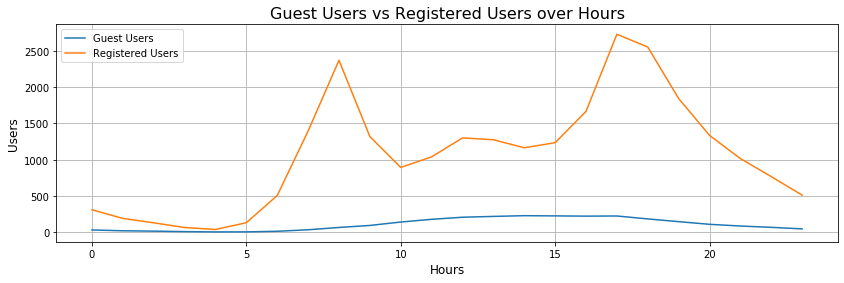

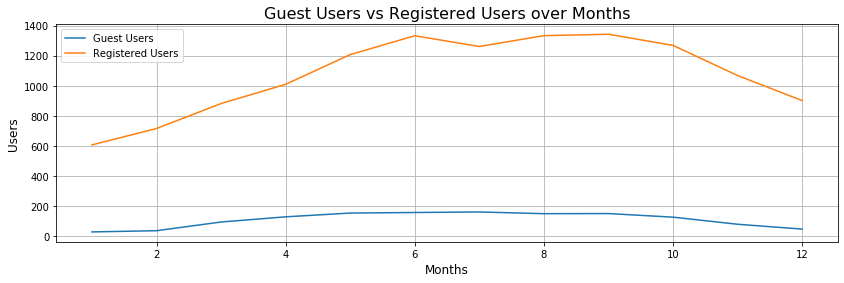

In [28]:
plt.subplots(figsize=(14,4))
temp_df = data.groupby('hr')['guest_scooter'].mean()
temp_df.plot(grid=True, label='Guest Users')
temp_df = data.groupby('hr')['registered_scooter'].mean()
temp_df.plot(grid=True, label='Registered Users')
plt.legend(loc="upper left")
plt.title('Guest Users vs Registered Users over Hours', fontsize=16)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Users', fontsize=12)

plt.subplots(figsize=(14,4))
temp_df = data.groupby('mth')['guest_scooter'].mean()
temp_df.plot(grid=True, label='Guest Users')
temp_df = data.groupby('mth')['registered_scooter'].mean()
temp_df.plot(grid=True, label='Registered Users')
plt.legend(loc="upper left")
plt.title('Guest Users vs Registered Users over Months', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Users', fontsize=12);

This is the first look of our target variable over time. I have also included resampled data of `'daily_users'`, `'weekly_users'`, `'monthly_users'`, `'quarterly_users'`, and `'annual_users'`. This shows how sensitive the line of hourly data which has 17,031 values is until how dull the line of annual data which has only 2 points is. If we were to use the hourly data, it will be too sensitive, inefficient, and it will take a very long time to train the model. On the other hand, if we take annually data, the model trained will be too dull and inaccurate as the seasonal and trend component is missing. This is why in the next portion, we can take a look at the range of lines to find something that is in between to work with.

In [29]:
# Shape of the data after dropping duplicates
data.shape

(17031, 19)

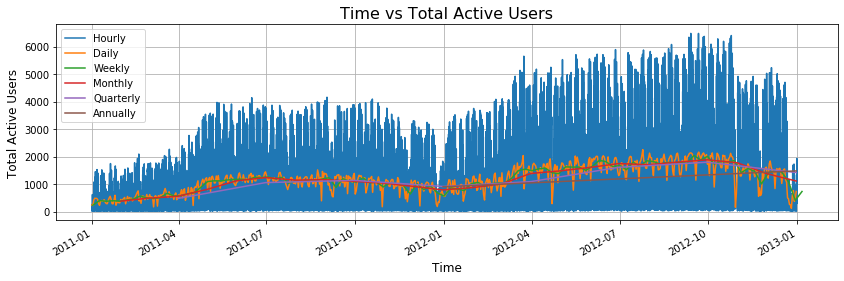

In [30]:
plt.subplots(figsize=(14,4))
daily_users = data['total_users'].resample('D').mean()
weekly_users = data['total_users'].resample('W').mean()
monthly_users = data['total_users'].resample('M').mean()
quarterly_users = data['total_users'].resample('Q').mean()
annual_users = data['total_users'].resample('A').mean()
data['total_users'].plot(grid=True, label='Hourly')
daily_users.plot(grid=True, label='Daily')
weekly_users.plot(grid=True, label='Weekly')
monthly_users.plot(grid=True, label='Monthly')
quarterly_users.plot(grid=True, label='Quarterly')
annual_users.plot(grid=True, label='Annually')
plt.legend(loc="upper left")
plt.title('Time vs Total Active Users', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Active Users', fontsize=12);

The next portion is to use the resampled data by summing instead of taking the mean. Taking the sum is the accurate measurement, in the previous graph, we took the mean is so that the lines will be shown together. 

This is to confirm which data will we try to work with to train our machine learning (ML) model. Ideally, we will take the `'data_wk'` and `'data_mth'` data to work with. If time permits, we will use the same model to train the `'data_day'` data.

In [31]:
def plot_function(x, y, label, title, method=plt, x_label="X", y_label="Y"):
    method.plot(x, y, label=label)
    method.legend(loc="upper left")
    method.set_title(title, size=16)
    method.set_xlabel(x_label, fontsize=12)
    method.set_ylabel(y_label, fontsize=12)
    method.grid(alpha=0.3)

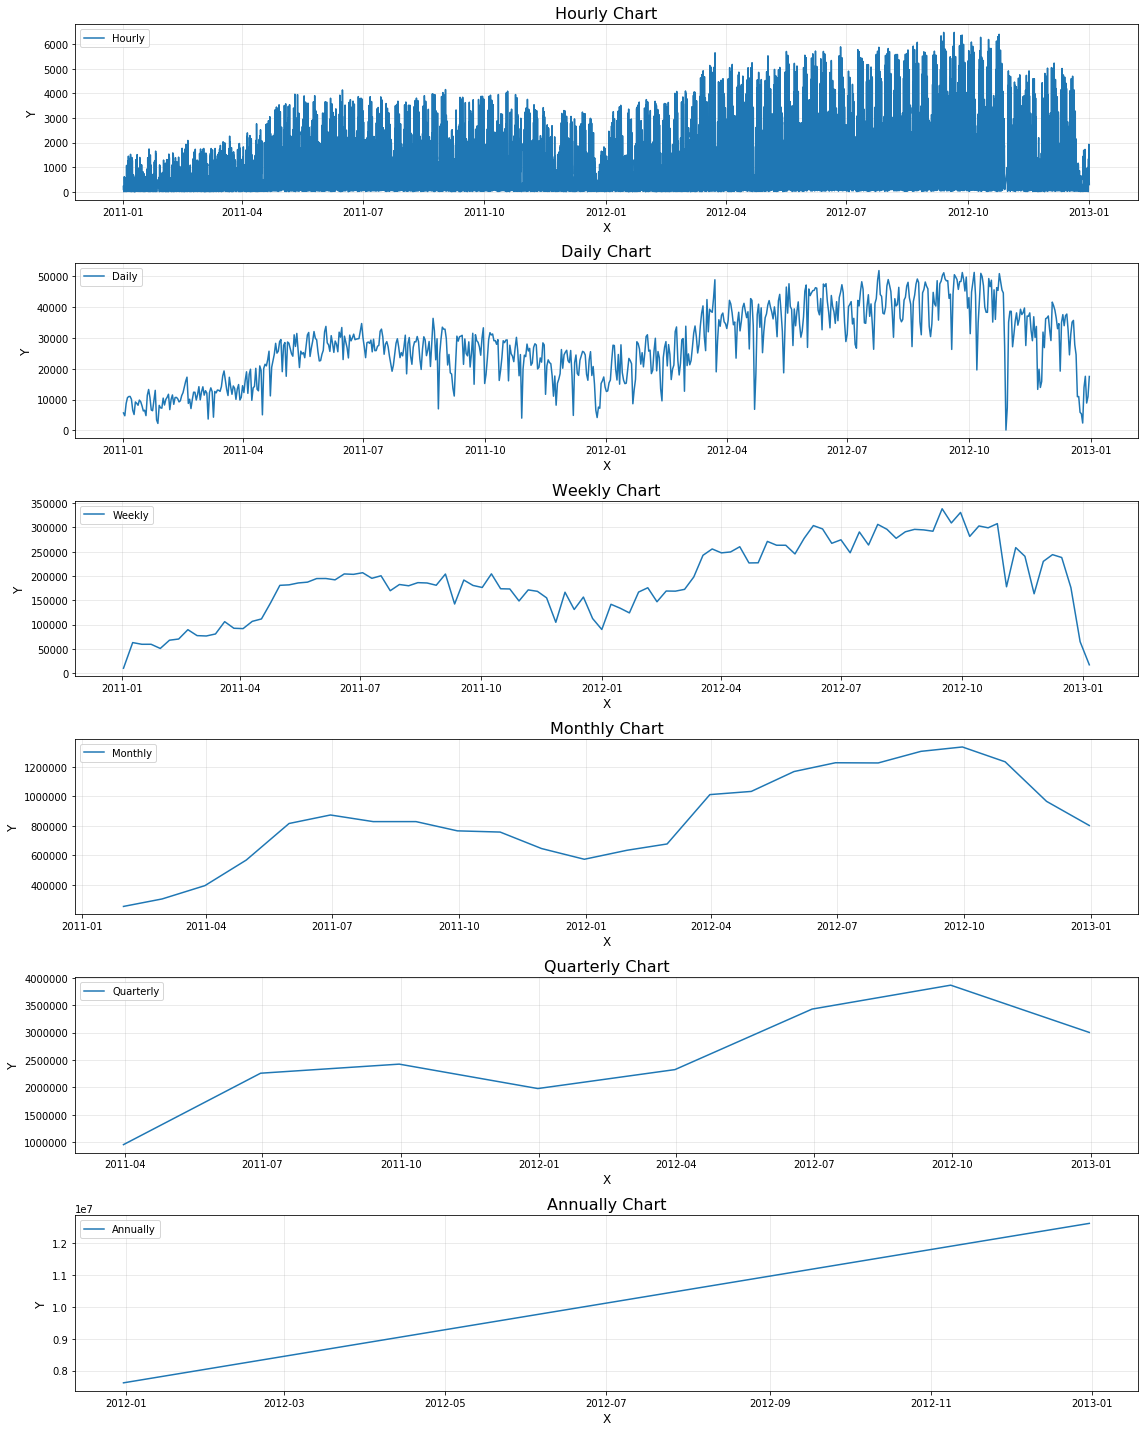

In [32]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(16,20), tight_layout=True)
plot_function(x=data.index, y=data['total_users'], method=ax[0], label='Hourly', title='Hourly Chart')
plot_function(x=data_day.index, y=data_day['total_users'], method=ax[1], label='Daily', title='Daily Chart')
plot_function(x=data_wk.index, y=data_wk['total_users'], method=ax[2], label='Weekly', title='Weekly Chart')
plot_function(x=data_mth.index, y=data_mth['total_users'], method=ax[3], label='Monthly', title='Monthly Chart')
plot_function(x=data_qtr.index, y=data_qtr['total_users'], method=ax[4], label='Quarterly', title='Quarterly Chart')
plot_function(x=data_yr.index, y=data_yr['total_users'], method=ax[5], label='Annually', title='Annually Chart')

For the first line plot plotted below, it is also interactive and we can choose which data frame and the Y variable. The following graphs only show 2 plots. They are using `'data_day'` data over 2 different Y variable, `'guest_scooter'` and `'registered_scooter'`. 

1. As `'heavy snow/rain'` has only 3 points, it has disappeared from the graphs. We can see it again in the interactive graph by selecting `'Hour'` from the data frame drop-down menu.
2. Both `'guest_scooter'` and `'registered_scooter'` are affected by weather conditions. There is a slight decrease when `'weather'` is `'light snow/rain'`. 
3. For both graphs, when the `'weather'` is `'clear'` or `'cloudy'`, it has almost the same number of users. The difference in the 2 graphs is how `'guest_scooter'` has higher oscillations than `'registered_scooter'`. This shows that `'registered_scooter'` is more consistent at using e-scooter rental than `'guest_scooter'`.

In [33]:
def f(Dataframe, Y):
    if Dataframe == 'Hour': temp = data
    elif Dataframe == 'Day': temp = data_day
    elif Dataframe == 'Month': temp = data_mth
    elif Dataframe == 'Quarter': temp = data_qtr
    elif Dataframe == 'Year': temp = data_yr
    
    if Y == 'Guest Users': temp_y = 'guest_scooter'
    elif Y == 'Registered Users': temp_y = 'registered_scooter'
    elif Y == 'Total Users': temp_y = 'total_users'
    
    plt.subplots(figsize=(14,4))
    sns.lineplot(data=temp, x=temp.index, y=temp_y, hue='weather')
    plt.title('Time vs ' + temp_y + ' with Weather Condition', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(Y, fontsize=12);

print('Choose resampled dataframe from the drop down menu.')
interact(f, Dataframe=['Hour', 'Day', 'Month', 'Quarter', 'Year'], 
        Y=['Guest Users', 'Registered Users', 'Total Users']);

Choose resampled dataframe from the drop down menu.


interactive(children=(Dropdown(description='Dataframe', options=('Hour', 'Day', 'Month', 'Quarter', 'Year'), v…

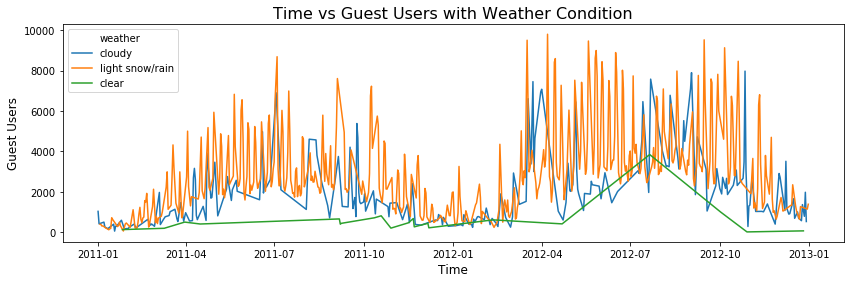

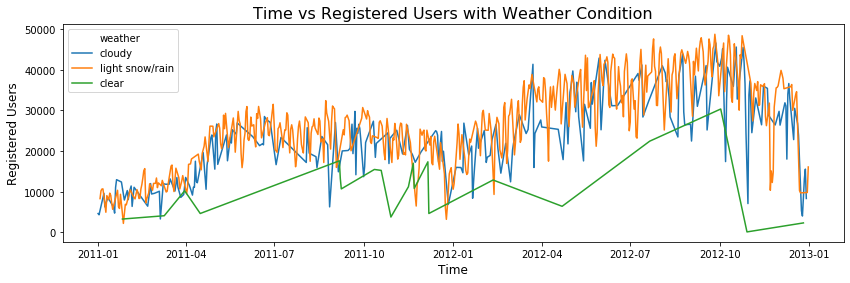

In [34]:
plt.subplots(figsize=(14,4))
sns.lineplot(data=data_day, x=data_day.index, y='guest_scooter', hue='weather')
plt.title('Time vs Guest Users with Weather Condition', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Guest Users', fontsize=12)

plt.subplots(figsize=(14,4))
sns.lineplot(data=data_day, x=data_day.index, y='registered_scooter', hue='weather')
plt.title('Time vs Registered Users with Weather Condition', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Registered Users', fontsize=12);

For the first line plot plotted below, it is also interactive and we can choose X, Y, variable and how it is groupby. The following graphs show 8 plots that are insightful and gave a more broad overview. The 2 columns compares `'registered_scooter'` with `'guest_scooter'`. To see more detail groupby for months and days of the week, we can use the interactive graph.

1. In the first row, `'registered_scooter'` is higher in all months during weekdays. While `'guest_scooter'` is higher in all months during weekends. 
2. In the second row, we can see that there is a growth from 2011 to 2012. And the hours when it peaked for `'guest_scooter'` is during working hours or noontime while `'registered_scooter'` peaked during hours going to and fro from work.
3. In the third row, this further confirms the information from point 1 and point 2. We can see how active `'registered_scooter'` is during weekdays to and fro from work. And `'guest_scooter'` is active during weekend and noontime. 
4. In the last row, we can see how `'registered_scooter'` growth peaked during June consistently for both weekdays and weekends. While `'guest_scooter'` peaked during June more for weekends compared to weekdays. An interesting point to add is from July to August and on weekends, both `'registered_scooter'` with `'guest_scooter'` declined in growth.

This information is important for implementing business strategies such as who, what, and when to launch the marketing plan.

In [35]:
def f(Groupby, X, Y):
    if Groupby == 'Month':
        temp, temp_order = 'mth', list(range(1,13))
    elif Groupby == 'Quarter':
        temp, temp_order = 'qtr', list(range(1,5))
    elif Groupby == 'Year':
        temp, temp_order = 'yr', list(range(2011,2013))
    # elif Groupby == 'Weather':
    #     temp, temp_order = 'weather', ['clear', 'cloudy', 'light snow/rain', 'heavy snow/rain']
    elif Groupby == 'Weekday':
        temp, temp_order = 'wkday', ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    elif Groupby == 'Weekend':
        temp, temp_order = 'is_wkend', [False, True]
    
    if X == 'Hour': temp_time = 'hr'
    elif X == 'Day': temp_time = 'day'
    elif X == 'Month': temp_time = 'mth'
    elif X == 'Quarter': temp_time = 'qtr'
    elif X == 'Year': temp_time = 'yr'
    # elif X == 'Weather': temp_time = 'weather'
    elif X == 'Weekday': temp_time = 'wkday'
    elif X == 'Weekend': temp_time = 'is_wkend'
    
    if Y == 'Guest Users': temp_y = 'guest_scooter'
    elif Y == 'Registered Users': temp_y = 'registered_scooter'
    elif Y == 'Total Users': temp_y = 'total_users'
    
    temp_df = data.groupby([temp_time, temp])[temp_y].mean().reset_index()
    plt.subplots(figsize=(14,4))
    sns.pointplot(data=temp_df, x=temp_time, y=temp_y, hue=temp, hue_order=temp_order)
    plt.title(X + ' vs ' + Y + ' Separated by ' + Groupby, fontsize=16)
    plt.xlabel(X, fontsize=12)
    plt.ylabel(Y, fontsize=12)
    plt.ylim(0)
    plt.legend(loc="upper left")
    plt.grid(alpha=0.3)

print('Choose which group and variable X from the 2 drop down menus.')
interact(f, Groupby=['Month', 'Quarter', 'Year', 'Weekday', 'Weekend'], 
        X=['Hour', 'Day', 'Month', 'Quarter', 'Year', 'Weekday', 'Weekend'],
        Y=['Guest Users', 'Registered Users', 'Total Users']);

Choose which group and variable X from the 2 drop down menus.


interactive(children=(Dropdown(description='Groupby', options=('Month', 'Quarter', 'Year', 'Weekday', 'Weekend…

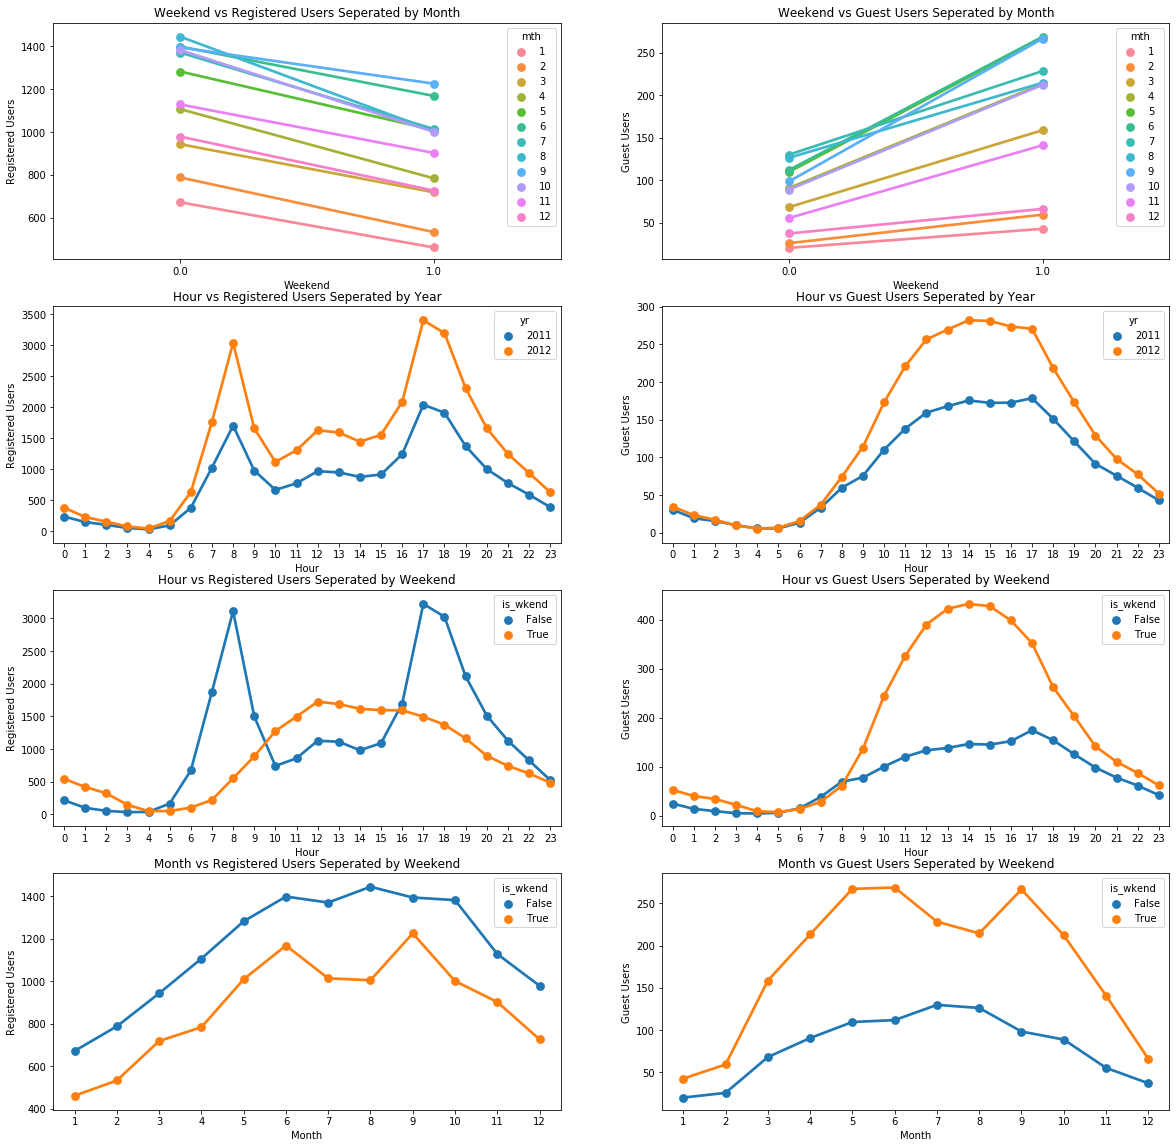

In [36]:
fig = plt.figure(figsize=(20, 20))
title = ['', 'Weekend vs Registered Users Seperated by Month', 'Weekend vs Guest Users Seperated by Month', 
         'Hour vs Registered Users Seperated by Year', 'Hour vs Guest Users Seperated by Year', 
         'Hour vs Registered Users Seperated by Weekend', 'Hour vs Guest Users Seperated by Weekend', 
         'Month vs Registered Users Seperated by Weekend', 'Month vs Guest Users Seperated by Weekend']
temp_time = ['', 'is_wkend', 'is_wkend', 'hr', 'hr', 'hr', 'hr', 'mth', 'mth']
temp_y = ['guest_scooter', 'registered_scooter']
temp = ['', 'mth', 'mth', 'yr', 'yr', 'is_wkend', 'is_wkend', 'is_wkend', 'is_wkend']
temp_order = ['', list(range(1,13)), list(range(1,13)), list(range(2011,2013)), list(range(2011,2013)), 
              [False, True], [False, True], [False, True], [False, True]]
temp_xlabel = ['', 'Weekend', 'Weekend', 'Hour', 'Hour', 'Hour', 'Hour', 'Month', 'Month']
temp_ylabel = ['Guest Users', 'Registered Users']

for i in range(1,9):
    temp_df = data.groupby([temp_time[i], temp[i]])[temp_y[i%2]].mean().reset_index()
    ax = fig.add_subplot(4,2,i)  
    sns.pointplot(data=temp_df, x=temp_time[i], y=temp_y[i%2], hue=temp[i], hue_order=temp_order[i])
    ax.set_title(title[i])
    ax.set_xlabel(temp_xlabel[i])
    ax.set_ylabel(temp_ylabel[i%2])

Seeing how different `'registered_scooter'` with `'guest_scooter'` columns are, I am interested to see what is the proportion and impact on our target variable. `'guest_scooter'` only makes up of 10%. Since our project object is to see active users and not how to achieve higher profitability, we will continue to use the `'total_users'` as our target variable. If this company does not make money from `'guest_scooter'`, then it is advisable to use only `'registered_scooter'`.

In [37]:
data['percent'] = data['guest_scooter'] / data['total_users']
print('Percentage of guest users over total users : {:.2f}%'.format(data['percent'].mean()*100))
del data['percent']

Percentage of guest users over total users : 9.68%


### Bar Plot - Finding Trends

Using box plots we can identify trends. From the first box plot plotted below, it is interactive and we can choose the X and Y variable. It is similar to line plots but for straight lines, it is more visually appealing.

In [38]:
def f(X, Y):
    if X == 'Hour': temp_x = 'hr'
    elif X == 'Day': temp_x = 'day'
    elif X == 'Month': temp_x = 'mth'
    elif X == 'Quarter': temp_x = 'qtr'
    elif X == 'Year': temp_x = 'yr'
    elif X == 'Weather': temp_x = 'weather'
    elif X == 'Weekday': temp_x = 'wkday'
    elif X == 'Weekend': temp_x = 'is_wkend'
    elif X == 'Temperature': temp_x = 'temperature'
    elif X == 'Feels like Temperature': temp_x = 'feels_like_temperature'
    elif X == 'Relative Humidity': temp_x = 'relative_humidity'
    elif X == 'Windspeed': temp_x = 'windspeed'
    elif X == 'PSI': temp_x = 'psi'
        
    if Y == 'Temperature': temp_y = 'temperature'
    elif Y == 'Feels like Temperature': temp_y = 'feels_like_temperature'
    elif Y == 'Relative Humidity': temp_y = 'relative_humidity'
    elif Y == 'Windspeed': temp_y = 'windspeed'
    elif Y == 'PSI': temp_y = 'psi'
    elif Y == 'Guest Users': temp_y = 'guest_scooter'
    elif Y == 'Registered Users': temp_y = 'registered_scooter'
    elif Y == 'Total Users': temp_y = 'total_users'
        
    temp = data.groupby(temp_x).mean()
    plt.subplots(figsize=(14,4))
    sns.barplot(data=temp, x=temp.index, y=temp_y)
    plt.title(X + '(X) vs ' + Y + '(Y)', fontsize=16)
    plt.xlabel(X, fontsize=12)
    plt.ylabel(Y, fontsize=12)
    plt.ylim(0)
    plt.grid(alpha=0.3)

print('Choose variable X and Y from the 2 drop down menus.')
interact(f, X=['Hour', 'Day', 'Month', 'Quarter', 'Year', 'Weather', 'Weekday', 'Weekend', 
               'Temperature', 'Feels like Temperature', 'Relative Humidity', 'Windspeed', 'PSI'], 
         Y=['Temperature', 'Feels like Temperature', 'Relative Humidity', 'Windspeed', 'PSI', 
            'Guest Users', 'Registered Users', 'Total Users']);

Choose variable X and Y from the 2 drop down menus.


interactive(children=(Dropdown(description='X', options=('Hour', 'Day', 'Month', 'Quarter', 'Year', 'Weather',…

From the interactive graph, I found 12 plots to be more insightful and also to show the relationship between weather conditions with time. This is to help us understand our dataset better. It is divided into 3 columns, the first is `'hr'`, the second is `'mth'`, and the last column is `'temperature'`.

1. In the first row, we can see that `'temperature'` is slightly higher during the day. And the `'temperature'` peaks during the middle of the year. Lastly, we can see that `'temperature'` and `'feels_like_temperature'` are highly correlated.
2. In the second row, we can see that `'relative_humidity'` is low during the day when `'temperature'` is high as seen in the first row.
3. In the third row, we can see that `'windspeed'` is inversely proportional to `'relative_humidity'` throughout the day shown by `'hr'` and the year shown by `'mth'`. When `'windspeed'` increases, `'relative_humidity'` decreases, and vice versa. 
4. In the last row, we can see `'psi'` has no relationship with `'hr'`, `'mth'`, and `'temperature'`. As it is zero gradient if we join across the top of the bars.

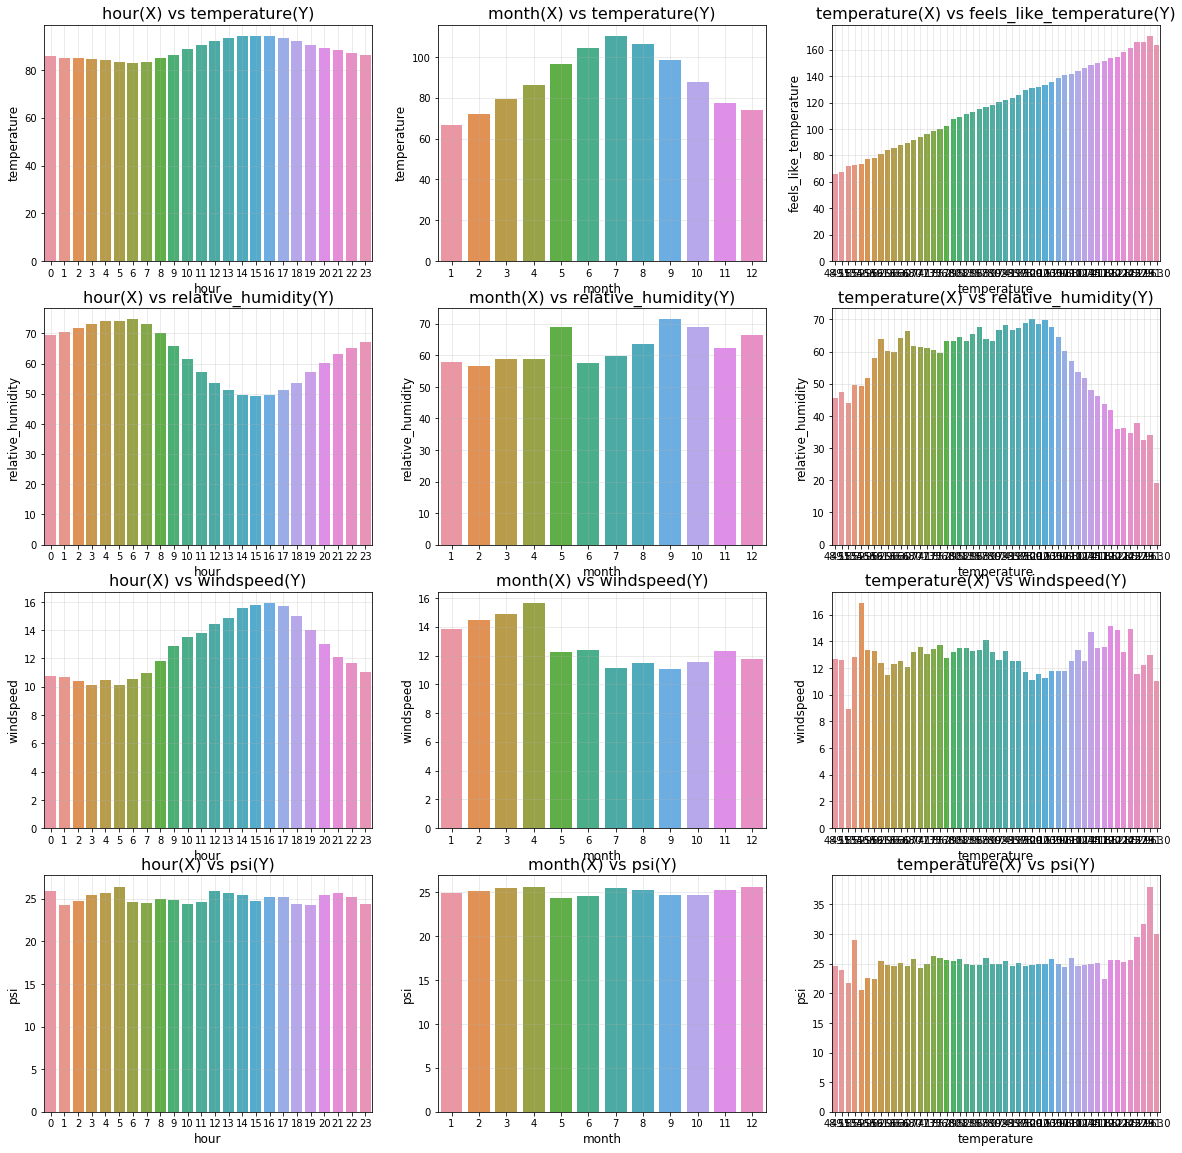

In [39]:
fig = plt.figure(figsize=(20, 20))
temp_x = ['temperature', 'hr', 'mth']
temp_y = ['', 'temperature', 'temperature', 'feels_like_temperature', 
         'relative_humidity', 'relative_humidity', 'relative_humidity',
         'windspeed', 'windspeed', 'windspeed', 'psi', 'psi', 'psi']
temp_xlabel = ['temperature', 'hour', 'month']


for i in range(1,13):
    temp_df = data.groupby(temp_x[i%3]).mean()
    ax = fig.add_subplot(4,3,i) 
    sns.barplot(data=temp_df, x=temp_df.index, y=temp_y[i])
    plt.title(temp_xlabel[i%3] + '(X) vs ' + temp_y[i] + '(Y)', fontsize=16)
    plt.xlabel(temp_xlabel[i%3], fontsize=12)
    plt.ylabel(temp_y[i], fontsize=12)
    plt.ylim(0)
    plt.grid(alpha=0.3)

From the 2 bar plots below, we can confirm as per our previous finding that `'weather'` has a bigger impact on `'guest_scooter'` than `'registered_scooter'`. Guest users are more unlikely to rent e-scooters especially when `'weather'` is `'light snow/rain'` and `'heavy snow/rain'`. 

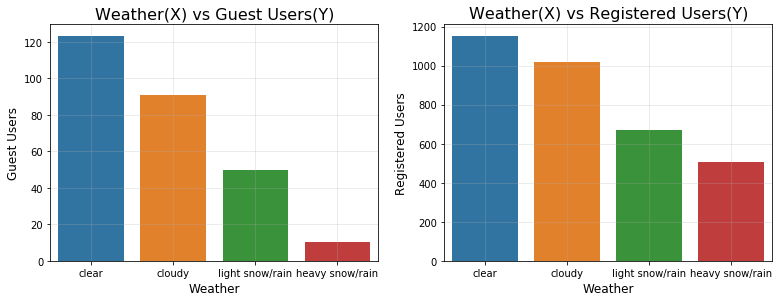

In [40]:
fig = plt.figure(figsize=(20, 20))
temp = data.groupby('weather').mean()
ax = fig.add_subplot(4,3,1) 
sns.barplot(data=temp, x=temp.index, y='guest_scooter', order=['clear', 'cloudy', 'light snow/rain', 'heavy snow/rain'])
plt.title('Weather(X) vs Guest Users(Y)', fontsize=16)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Guest Users', fontsize=12)
plt.grid(alpha=0.3)

ax = fig.add_subplot(4,3,2) 
sns.barplot(data=temp, x=temp.index, y='registered_scooter', order=['clear', 'cloudy', 'light snow/rain', 'heavy snow/rain'])
plt.title('Weather(X) vs Registered Users(Y)', fontsize=16)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Registered Users', fontsize=12)
plt.grid(alpha=0.3)

### Scatter Plot - Comparing the Strength of Relationships

Using scatter plots, we can plot the best fit line and show how strong the relationship is. From the 2 scatter plots below, we can see that `'temperature'` has a higher impact on `'guest_scooter'` than `'registered_scooter'`. This is deduced from the gradient steepness seem on `'guest_scooter'` than on `'registered_scooter'`.

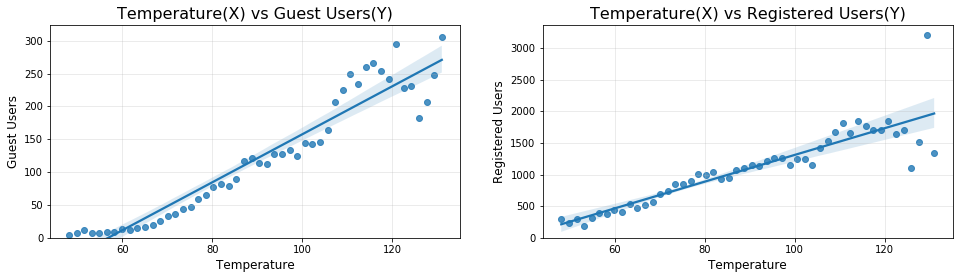

In [41]:
temp = data.groupby('temperature').mean()
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(4,3,1) 
sns.regplot(data=temp, x=temp.index, y='guest_scooter')
plt.title('Temperature(X) vs Guest Users(Y)', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Guest Users', fontsize=12)
plt.ylim(0)
plt.grid(alpha=0.3)

ax = fig.add_subplot(4,3,2) 
sns.regplot(data=temp, x=temp.index, y='registered_scooter')
plt.title('Temperature(X) vs Registered Users(Y)', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Registered Users', fontsize=12)
plt.ylim(0)
plt.grid(alpha=0.3)

But if we plot them together, we can take a closer look to see that even if the gradient looks steeper for `'guest_scooter'` than `'registered_scooter'`, it is not true. As the values for `'guest_scooter'` is so much smaller than `'registered_scooter'`, `'temperature'` is a big impact for `'guest_scooter'` but this is not even worth comparing with `'registered_scooter'`.  

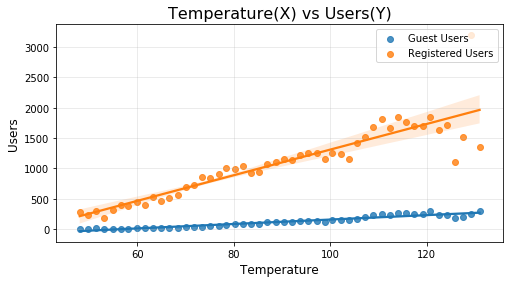

In [42]:
temp = data.groupby('temperature').mean()
plt.figure(figsize=(8, 4))
sns.regplot(data=temp, x=temp.index, y='guest_scooter', label='Guest Users')
sns.regplot(data=temp, x=temp.index, y='registered_scooter', label='Registered Users')
plt.title('Temperature(X) vs Users(Y)', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

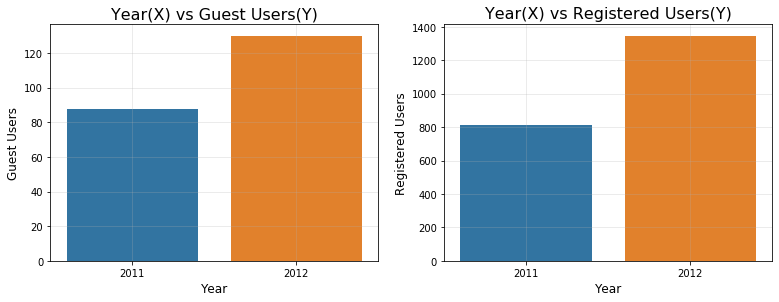

In [43]:
fig = plt.figure(figsize=(20, 20))
temp = data.groupby('yr').mean()
ax = fig.add_subplot(4,3,1) 
sns.barplot(data=temp, x=temp.index, y='guest_scooter')
plt.title('Year(X) vs Guest Users(Y)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Guest Users', fontsize=12)
plt.grid(alpha=0.3)

ax = fig.add_subplot(4,3,2) 
sns.barplot(data=temp, x=temp.index, y='registered_scooter')
plt.title('Year(X) vs Registered Users(Y)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Registered Users', fontsize=12)
plt.grid(alpha=0.3)

# EDA Conclusion

From all the information gathered, we can make a guess that registered e-scooter users are renting e-scooters mainly for work and will rent regardless of weather conditions. While guest e-scooter users are renting e-scooters mainly when the `'weather'` is `'clear'` and `'temperature'` is high. 

Therefore if there is no revenue model for guest e-scooter users, it is more worthwhile to drop the company's effort in acquiring more guest e-scooter users. And focus more on working with big corporations on registration package to entice more employees and increase registered e-scooter users. 

It is only worthwhile to focus on guest e-scooter users based on these conditions; <br>
1. Guest e-scooter users conversion rate to registered e-scooter users is significant. 
2. The company is able to collect information such as demographic, GPS, user personal and health information, usage time, user experience, and conversion rate.
3. There is a higher quantity of e-scooters to registered users.
4. The growth of registered users to guest users is inversely proportional, which isn't the case as confirmed from the line plot seen from above.
5. Effective marketing plan, potential marketeer, or distributor/event company confident to undertake this portion of the business, ensuring the e-scooter company keeps the cost low.
6. Able to expand overseas with similar conditions but has better weather throughout the year or stronger culture of work/life balance.
7. And of course, a well thought out revenue model. This will be able to attract investors to expand and scale the business onto a global corporation.

# End-to-end Machine Learning (MLP)

In this portion, we will be creating a simple machine learning pipeline that will ingest/process the dataset and
feed it into appropriate machine learning algorithm(s), returning suitable metrics as outputs. This is broken down into different sections. 

* Featured Engineering
* Univariante Time Series Analysis
* Train Model
* Validation
* Deployment

# Featured Engineering

In this section, we will prepare the data so we can use it to train the selected ML model. 

1. Drop variables that would not contribute to our ML model
2. Interpolating missing values
3. Identifying and removing outliers
4. Interpolate for new missing values
5. Split the data into X and y of testing and training dataset

In [44]:
# 1. Drop Variables
def remove_cols(df):
    try:
        del df['date'] # this is represented by 'day', 'mth', and 'yr'
    except Exception:
        pass
    try:
        del df['qtr'] # this is translated from 'mth'
    except Exception:
        pass
    try:
        del df['wkday'] # this is represented numerically by 'wkday_num'
    except Exception:
        pass
    try:
        del df['is_wkend'] # this is translated from 'wkday_num'
    except Exception:
        pass
    try:
        del df['weather'] # this is represented numerically by 'weather_num'
    except Exception:
        pass
    try:
        del df['feels_like_temperature'] # this is similar as 'temperature'
    except Exception:
        pass
    try:
        del df['guest_scooter'] # this is calculated into 'total_users'
    except Exception:
        pass
    try:
        del df['registered_scooter'] # this is calculated into 'total_users'
    except Exception:
        pass

remove_cols(data)

In [45]:
# 2. Create New Dataframe with Full Time Range
temp_df = pd.DataFrame({'date_time': pd.date_range('2011-01-01', '2012-12-31', freq='1H', closed='left')})
data = pd.merge(temp_df, data, how='left', on='date_time')
data['date_time'] = pd.to_datetime(data['date_time'])

The strategy for the filling missing value for this dataset is to use the weighted average at the same hour for the last 7 days as these variables have a weekly consistency. 

After creating the new data frame, we will first fill up the missing values for the first 7 days. This way, we will be able to use this information for the remaining dataset. The values that will be used are weighted averages from the sum of the past 5 hours and the next 5 hours and average it, giving the closest values more weight. For rows with consecutive missing values, because of the missing value, it will remain as na. For these values, we will only use the weighted average for the past 5 hours.

Filling missing values is a crucial step, because if we just apply forward fill or interpolation blindly, it may cause our validation metrics to fail during ML modeling. Some of there is a big gap or if the interpolation goes out of range, it will cause our validation metrics to fail. 

In [46]:
# Function to fill na
def fillna_w_weighted_avg(df, col, num, x=0):
    for index, row in df.iterrows():
        if(pd.isnull(row[col])):
            counter = 0 
            total = 0
            for i in range(1, num+1):
                counter = counter + (df.loc[index+i, col] * (num+1-i)) + (df.loc[index-i, col] * (num+1-i))
                total = total + (num+1-i) + (num+1-i)
            df.loc[index, col] = round(counter/total, x)

def fillna_w_back_weighted_avg(df, col, num, x=0):
    for index, row in df.iterrows():
        if(pd.isnull(row[col])):
            counter = 0 
            total = 0
            for i in range(1, num+1):
                counter = counter + (df.loc[index-i, col] * (num+1-i))
                total = total + (num+1-i)
            df.loc[index, col] = round(counter/total, x)
            
def fillna_w_ytd_value(df, col, num, x=0):
    for index, row in df.iterrows():
        if(pd.isnull(row[col])):
            counter = 0
            total = 0
            for i in range(1, num+1):
                counter = counter + (df.loc[index-(24*i), col] * (num+1-i))
                total = total + (num+1-i)
            df.loc[index, col] = round(counter/total, x)
                
def combine_fillna(df, col, x=0):
    fillna_w_weighted_avg(df.iloc[:7*24,], col, 5, x)
    fillna_w_back_weighted_avg(df.iloc[:7*24,], col, 5, x)
    fillna_w_ytd_value(df, col, 7, x)

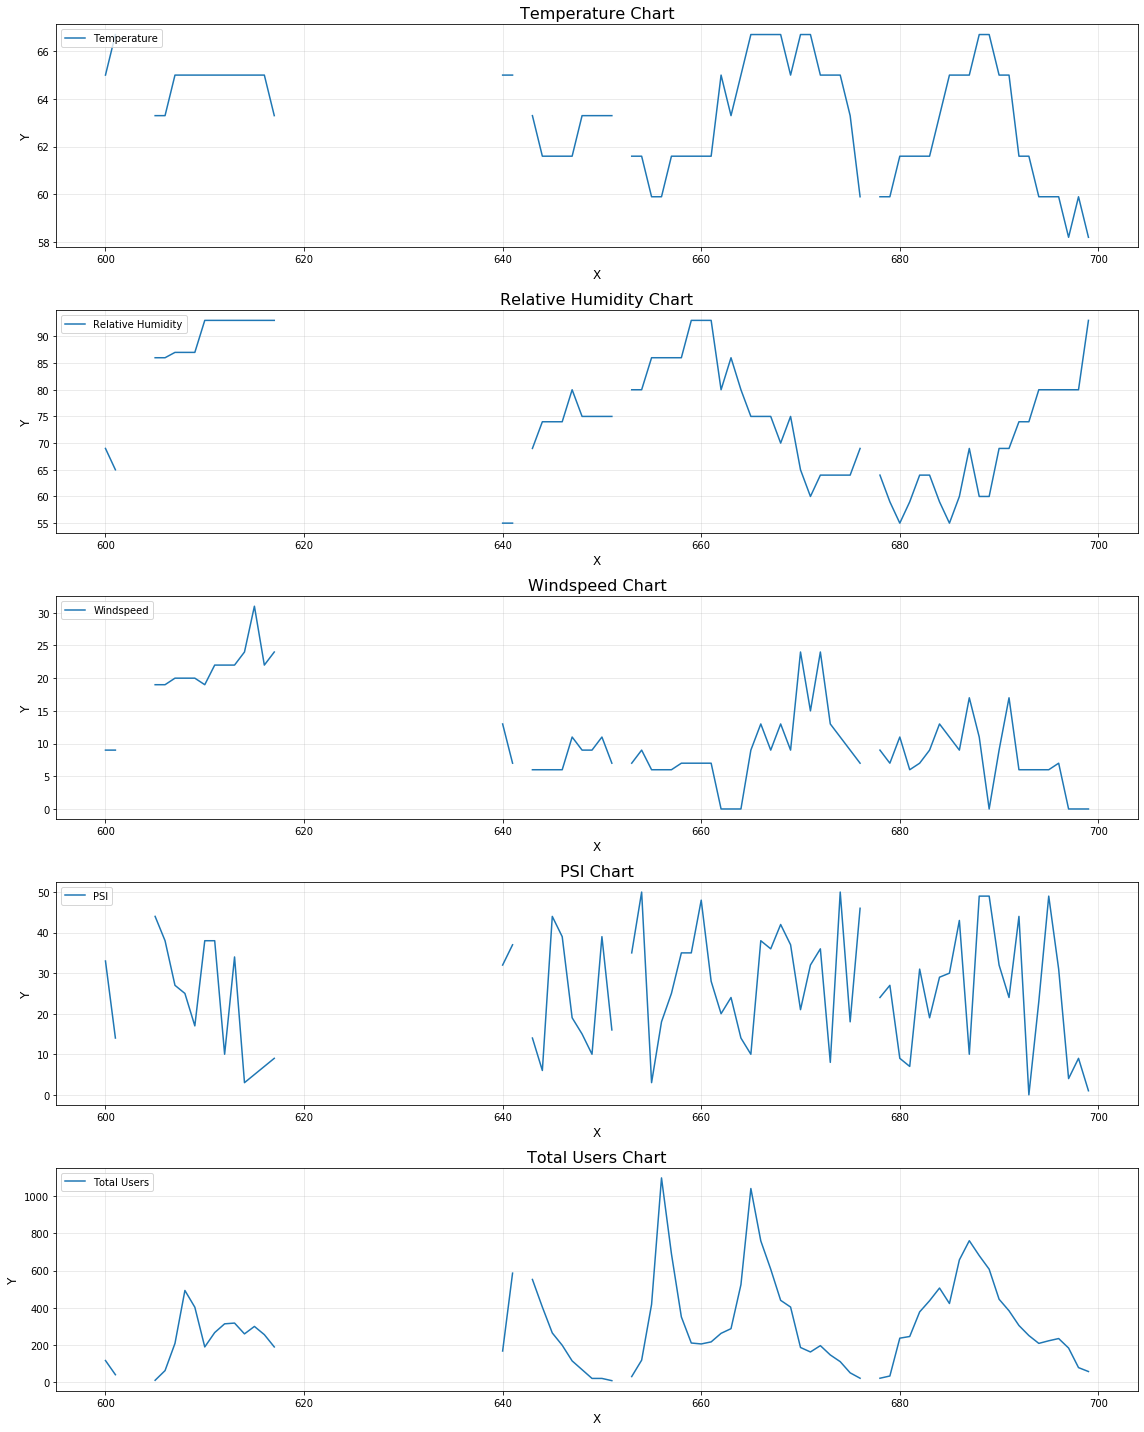

In [47]:
# Plot line graphs to see how we should interpolate missing values for these columns
# As shown, this is our main concern as it is the gap with most missing values
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16,20), tight_layout=True)
plot_function(x=data.index[600:700], y=data['temperature'][600:700], method=ax[0], label='Temperature', title='Temperature Chart')
plot_function(x=data.index[600:700], y=data['relative_humidity'][600:700], method=ax[1], label='Relative Humidity', title='Relative Humidity Chart')
plot_function(x=data.index[600:700], y=data['windspeed'][600:700], method=ax[2], label='Windspeed', title='Windspeed Chart')
plot_function(x=data.index[600:700], y=data['psi'][600:700], method=ax[3], label='PSI', title='PSI Chart')
plot_function(x=data.index[600:700], y=data['total_users'][600:700], method=ax[4], label='Total Users', title='Total Users Chart')

In [48]:
# Checkpoint and Backup
df1 = data.copy()
df2 = data.copy()

In [49]:
# Fill missing values
combine_fillna(data, 'weather_num')
combine_fillna(data, 'temperature', x=1)
combine_fillna(data, 'relative_humidity')
combine_fillna(data, 'windspeed')
combine_fillna(data, 'psi')
combine_fillna(data, 'total_users')

C:\Users\Public\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


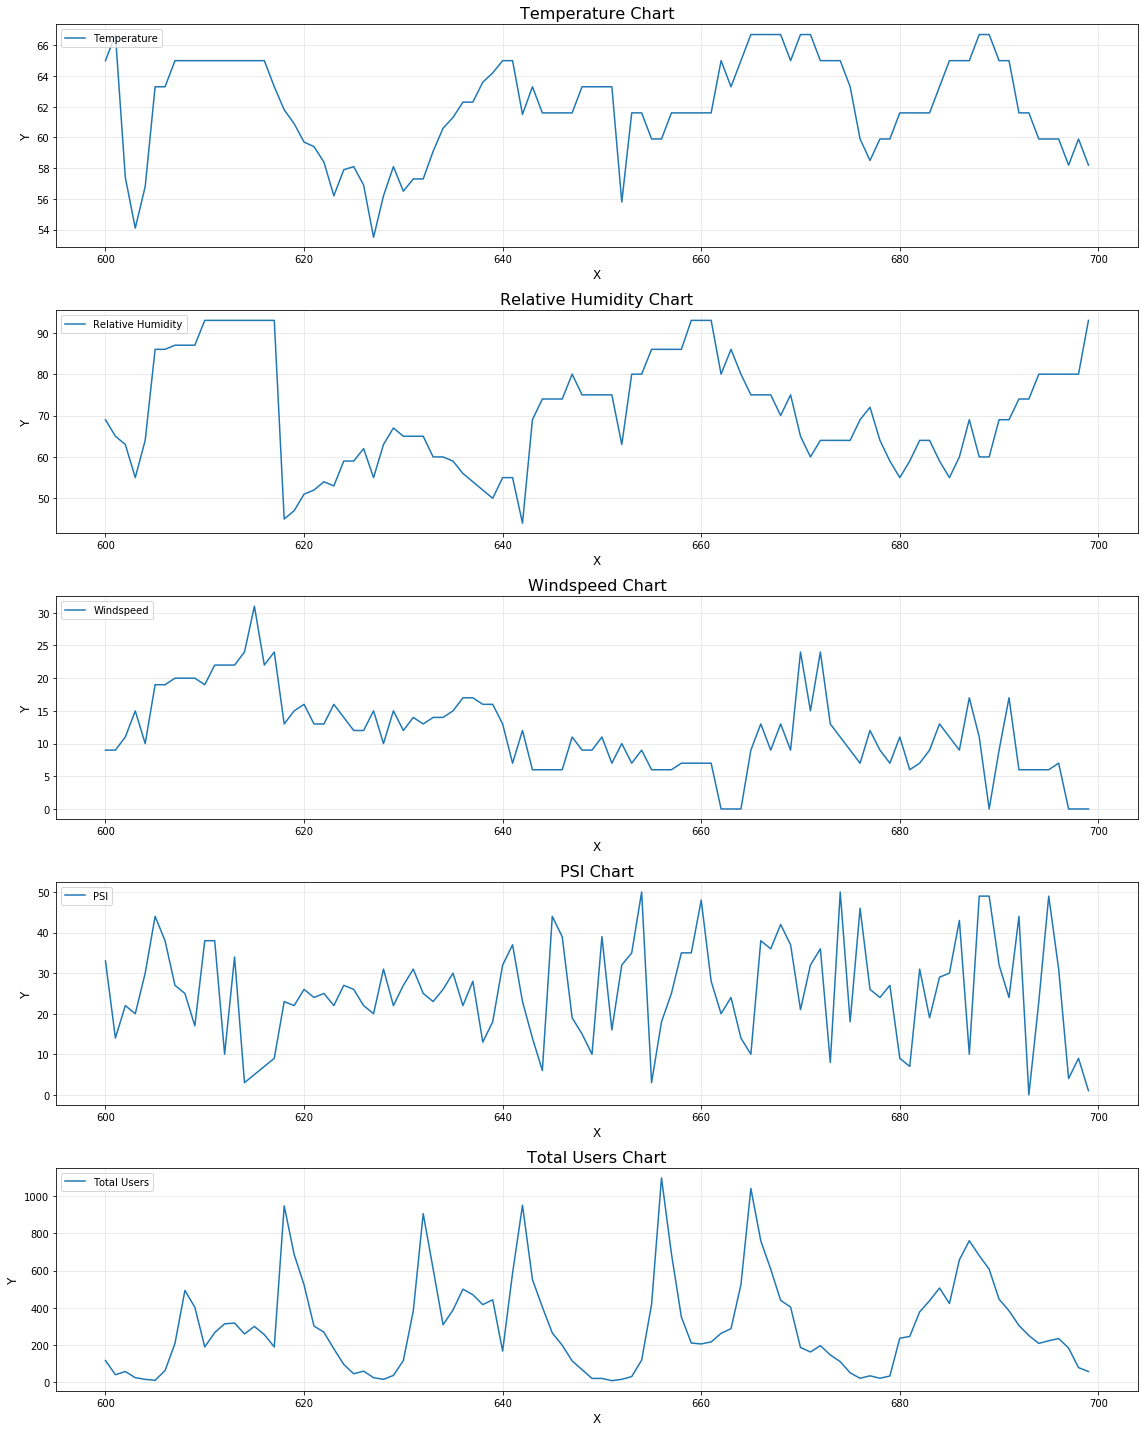

In [50]:
# Plot line graphs to see how we should interpolate missing values for these columns
# As shown, this is our main concern as it is the gap with most missing values
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16,20), tight_layout=True)
plot_function(x=data.index[600:700], y=data['temperature'][600:700], method=ax[0], label='Temperature', title='Temperature Chart')
plot_function(x=data.index[600:700], y=data['relative_humidity'][600:700], method=ax[1], label='Relative Humidity', title='Relative Humidity Chart')
plot_function(x=data.index[600:700], y=data['windspeed'][600:700], method=ax[2], label='Windspeed', title='Windspeed Chart')
plot_function(x=data.index[600:700], y=data['psi'][600:700], method=ax[3], label='PSI', title='PSI Chart')
plot_function(x=data.index[600:700], y=data['total_users'][600:700], method=ax[4], label='Total Users', title='Total Users Chart')

In [51]:
# Check for Adnomalities
data.describe()

hr           day           mth            yr     wkday_num  \
count  17007.000000  17007.000000  17007.000000  17007.000000  17007.000000   
mean      11.558594     15.667549      6.530135   2011.501147      3.016934   
std        6.919640      8.784938      3.436752      0.500013      2.000751   
min        0.000000      1.000000      1.000000   2011.000000      0.000000   
25%        6.000000      8.000000      4.000000   2011.000000      1.000000   
50%       12.000000     16.000000      7.000000   2012.000000      3.000000   
75%       18.000000     23.000000     10.000000   2012.000000      5.000000   
max       23.000000     31.000000     12.000000   2012.000000      6.000000   

        weather_num   temperature  relative_humidity     windspeed  \
count  17520.000000  17520.000000       17520.000000  17520.000000   
mean       2.573858     88.353482          62.735788     12.731507   
std        0.635823     16.305486          19.156289      8.101400   
min        0.000000     48.100000           0.000000      0.000000   
25%        2.000000     75.200000          48.000000      7.000000   
50%        3.000000     88.700000          63.000000     13.000000   
75%        3.000000    102.200000          78.000000     17.000000   
max        3.000000    131.000000         100.000000     57.000000   

                psi   total_users  
count  17520.000000  17520.000000  
mean      25.085959   1183.986130  
std       14.291619   1139.694394  
min        0.000000      3.000000  
25%       13.000000    256.000000  
50%       25.000000    894.000000  
75%       37.000000   1737.000000  
max       50.000000   6479.000000

### Boxplot - Finding Outliers

Plotting the box plots can help us to identify outliers in our dataset. Any points that are beyond the wick from both ends are outliers. And we will use the interquartile formula to remove those identified with outliers. This is to prepare our dataset for ML modeling. 

We will be dropping columns `'feels_like_temperature'` as it is highly correlated with `'temperature'` and to prevent multicollinearity we will be dropping this column. We will also be dropping `'guest_scooter'` and `'registered_scooter'`, as we only need `'total_users'` as our target variable. So we will plot box plot for `'temperature'`, `'relative_humidity'`, `'windspeed'`, `'psi'`, and `'total_users'`.

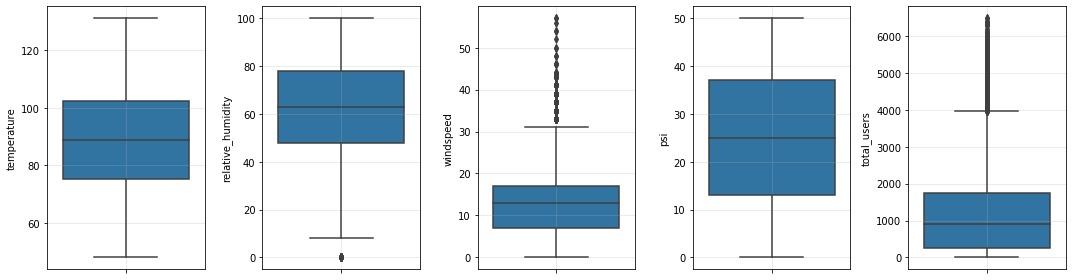

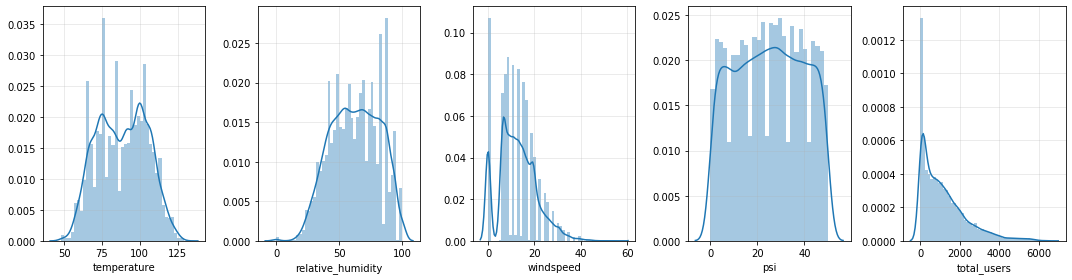

In [52]:
# 3. Identifying Outliers
fig = plt.figure(figsize=(15, 4))
temp_x = ['', 'temperature', 'relative_humidity', 'windspeed', 'psi', 'total_users']

for i in range(1,6):
    ax = fig.add_subplot(1,5,i) 
    sns.boxplot(data=data, x=temp_x[i], orient='v')
    plt.grid(alpha=0.3)
    
fig.tight_layout();

# Plotting Frequency Plot
fig = plt.figure(figsize=(15, 4))
temp_x = ['', 'temperature', 'relative_humidity', 'windspeed', 'psi', 'total_users']

for i in range(1,6):
    ax = fig.add_subplot(1,5,i) 
    sns.distplot(data[temp_x[i]])
    plt.grid(alpha=0.3)
    
fig.tight_layout()

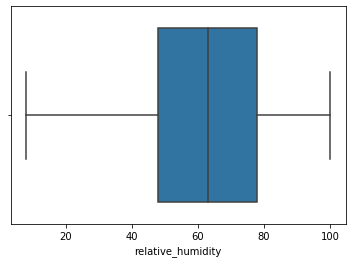

In [53]:
# Removing Outliers for 'relative_humidity'
def remove_lower_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    df.loc[df[col] < minimum, col] = np.nan

remove_lower_outliers(data, 'relative_humidity')

# Confirm there is no more Outliers
sns.boxplot(data=data, x='relative_humidity', orient='h');

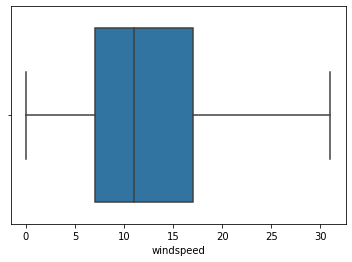

In [54]:
# Removing Outliers for 'windspeed'
def remove_upper_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + 1.5 * IQR
    df.loc[df[col] > maximum, col] = np.nan

remove_upper_outliers(data, 'windspeed')

# Confirm there is no more Outliers
sns.boxplot(data=data, x='windspeed', orient='h');

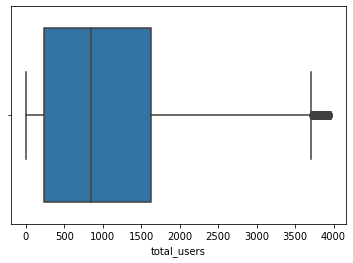

In [55]:
# Removing Outliers for 'total_users'
remove_upper_outliers(data, 'total_users')

# Confirm there is no more Outliers
sns.boxplot(data=data, x='total_users', orient='h');

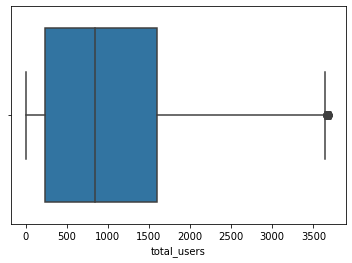

In [56]:
# Removing Outliers for 'total_users' again
remove_upper_outliers(data, 'total_users')

# Confirm there is no more Outliers
sns.boxplot(data=data, x='total_users', orient='h');

After checking `'total_users'`, outliers can still be seen. As we only remove outliers from the top, we can apply the function at most one more time. 

As we can see, outliers can still be observed even after we apply our function twice. But we will leave this as it is.

In [57]:
# 4. Fill new missing values
combine_fillna(data, 'relative_humidity')
combine_fillna(data, 'windspeed')
combine_fillna(data, 'total_users')

In [58]:
# Filling the remaining missing values
data.index = data['date_time']
data['hr'] = data.index.hour
data['day'] = data.index.day
data['mth'] = data.index.month
data['yr'] = data.index.year
data['wkday_num'] = data.index.dayofweek
del data['date_time']

In [59]:
print ('Missing Values :', data.isnull().sum().values.sum())

Missing Values : 0


In [60]:
# Checkpoint and backup
df1 = data.copy()
df2 = data.copy()

In [61]:
# 5. Split the data into X and y
X = data.drop('total_users', axis=1)
y = data['total_users']

In [62]:
X_day = X.resample('d').mean() 
y_day = y.resample('d').sum()

In [63]:
X_wk = X.resample('w').mean() 
y_wk = y.resample('w').sum()

In [64]:
# Split data in train and test set
def train_test_split(df, days, multiplier=1):
    train = df[:-days*multiplier]
    test = df[-days*multiplier:]
    return train, test

X_train, X_test = train_test_split(X, 31, multiplier=24)
y_train, y_test = train_test_split(y, 31, multiplier=24)

In [65]:
X_day_train, X_day_test = train_test_split(X_day, 31)
y_day_train, y_day_test = train_test_split(y_day, 31)

In [66]:
X_wk_train, X_wk_test = train_test_split(X_wk, 4)
y_wk_train, y_wk_test = train_test_split(y_wk, 4)

# Model Selection

We will start with univariante time series analysis to get a feel of the data before proceeding to multivariante ML modeling using XGBoost.

### Validation Metrics

Before starting model selection, we have to find appropriate validation metrics. This will help us to be objective and impartial. We will be using 2 metrics and a scatter plot to validate the performance of the ML models used. Using the scatter plot, we can see how well correlated is our prediction compared with the results.

* `MAE` Mean absolute error
* `RMSE` Root mean sq error
* `Scatter Plot`

In [67]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [68]:
def ols_test(y_test, y_pred, test=False, label=False):
    X = sm.add_constant(y_test)
    model = sm.OLS(y_pred, X)
    results = model.fit()
    
    fig = plt.figure(figsize=(15, 4))
    plt.scatter(y_test, y_pred, alpha=0.3)
    y_predict = results.params[0] + results.params[1] * y_test
    plt.plot(y_test, y_predict, color='orange')
    if label==True:
        plt.xlabel('True Results')
        plt.ylabel('Predicted Results')
    plt.title('OLS Regression')
    print(results.summary())
    
    if test==True:
        print('MAE : {0:.3f}'.format(mean_absolute_error(y_test, y_pred)))
        print('RMSE : {0:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))

### Univariante Time Series Analysis

In [69]:
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.stats.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1512.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          9.73e-317
Time:                        16:15:15   Log-Likelihood:            -1.3771e+05
No. Observations:               16776   AIC:                         2.754e+05
Df Residuals:                   16774   BIC:                         2.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        627.6771     13.726     45.727      0.0

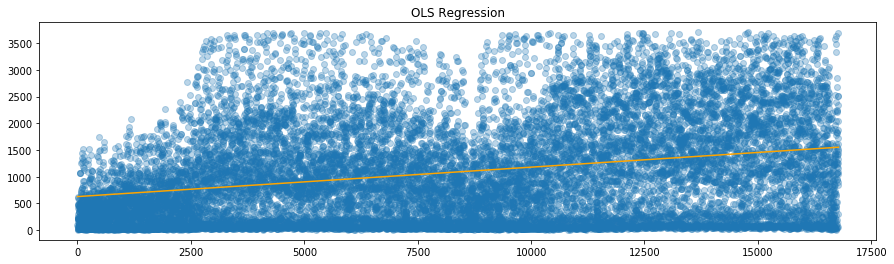

In [70]:
temp_df = pd.DataFrame(y_train)
temp_df['index'] = temp_df.reset_index().index
ols_test(temp_df['index'], temp_df['total_users'])

The R squared is less than 0.1, this indicates that the dependent variable, total active users is not really well explained by the independent variable, hourly time series. We will also use this to test our ML model. 

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     666.4
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          1.21e-103
Time:                        16:15:15   Log-Likelihood:                -7132.6
No. Observations:                 699   AIC:                         1.427e+04
Df Residuals:                     697   BIC:                         1.428e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.51e+04    494.592     30.539      0.0

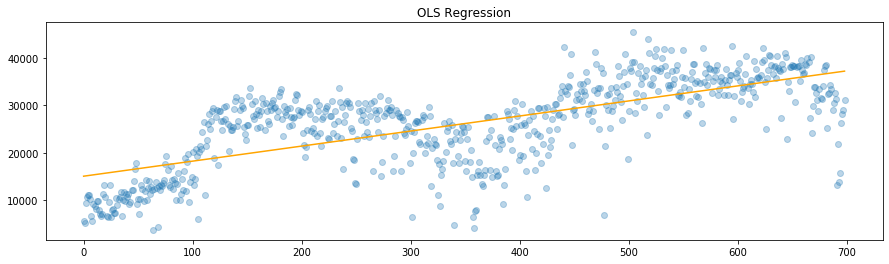

In [71]:
temp_df = pd.DataFrame(y_day_train)
temp_df['index'] = temp_df.reset_index().index
ols_test(temp_df['index'], temp_df['total_users'])

Just changing from hourly data to daily data, the R square here is becomes much higher and can better relate to the dependent variable. 

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     153.7
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           7.33e-22
Time:                        16:15:15   Log-Likelihood:                -1206.0
No. Observations:                 101   AIC:                             2416.
Df Residuals:                      99   BIC:                             2421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.027e+05   7403.807     13.868      0.0

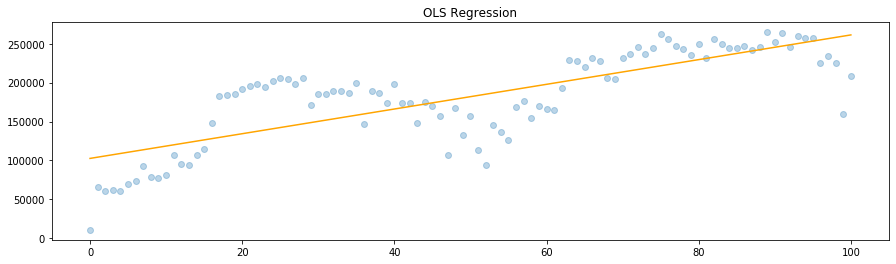

In [72]:
temp_df = pd.DataFrame(y_wk_train)
temp_df['index'] = temp_df.reset_index().index
ols_test(temp_df['index'], temp_df['total_users'])

Interestingly, changing from daily data to weekly data, the R square here is dropped slightly.

In [73]:
def plot_mean_std(df, days, multiplier=1):
    temp_mean = df.rolling(days*multiplier).mean()
    temp_std = df.rolling(days*multiplier).std()
    
    fig = plt.figure(figsize=(15, 4))  
    plt.plot(df, label='Original')
    plt.plot(temp_mean, label='Rolling Mean')
    plt.plot(temp_std, label='Rolling Std.')
    plt.xlabel('Time')
    plt.ylabel('Total Users')
    plt.title('Rolling Mean & Std. Deviation')
    plt.legend()
    plt.show()

def adfuller_test(df):
    result = adfuller(df, autolag='AIC')
    print('Test Statistic : ', result[0])
    print('p-Value : ', result[1])
    print('Critical Values :', result[4])

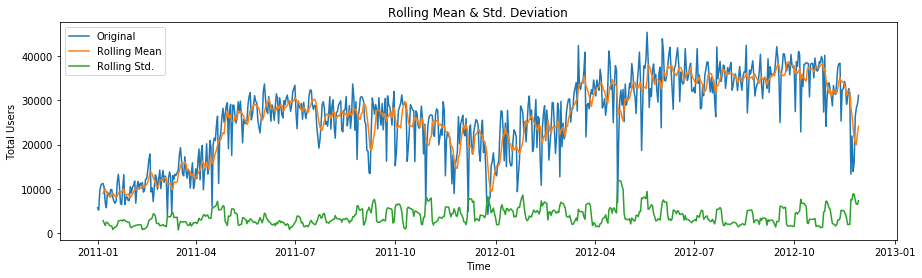

Test Statistic :  -2.2517983598168887
p-Value :  0.1879852491784212
Critical Values : {'1%': -3.4399324443722814, '5%': -2.865768564020576, '10%': -2.5690218258831052}


In [74]:
temp_df = pd.DataFrame(y_day_train)
timeseries = temp_df.loc[:, ['total_users']]
plot_mean_std(timeseries, 1, 6)
adfuller_test(timeseries['total_users'])

* The first criterion for stationarity is a constant mean. From the orange line above, the mean is not constant.
* Secondly, we need to achieve a constant variance. From the graph above, it looks to be quite constant.
* Thirdly, if the test statistic is less than the critical values, we can say that the time series is stationary.

Therefore, we need to achieve a constant mean by applying differencing, and stationarity is achievable.

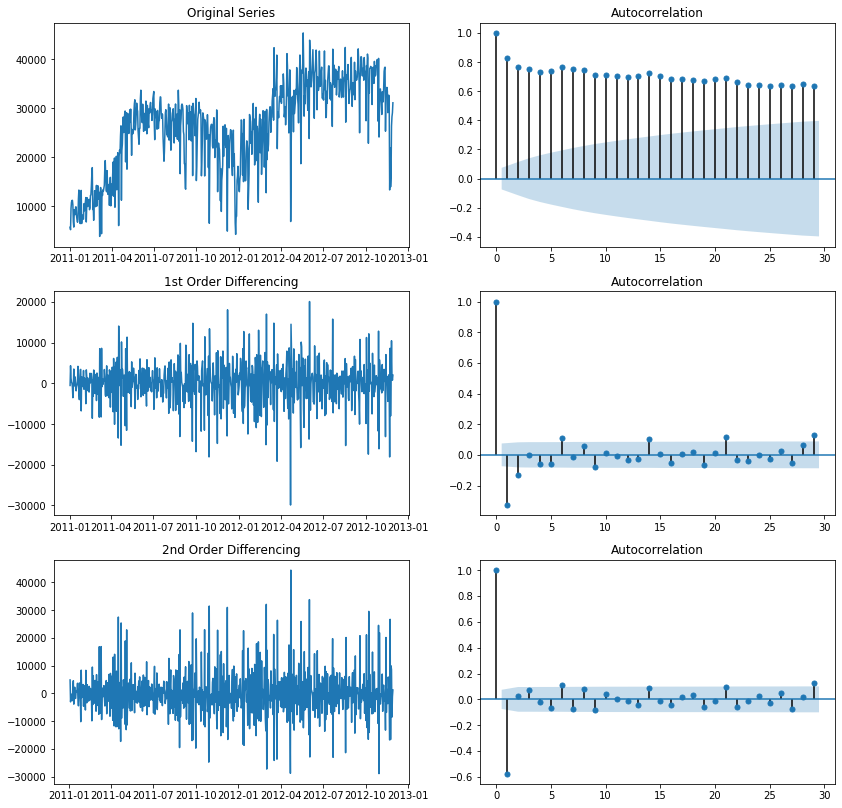

In [75]:
# Original Time series
fig, axes = plt.subplots(3,2, figsize=(14,14))
axes[0,0].plot(temp_df['total_users']); 
axes[0,0].set_title('Original Series')
plot_acf(temp_df['total_users'], ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(temp_df['total_users'].diff()); 
axes[1,0].set_title('1st Order Differencing')
plot_acf(temp_df['total_users'].diff().dropna(), ax=axes[1,1])

# 2nd Differencing
axes[2,0].plot(temp_df['total_users'].diff().diff()); 
axes[2,0].set_title('2nd Order Differencing')
plot_acf(temp_df['total_users'].diff().diff().dropna(), ax=axes[2,1])

plt.show()

From the above series, the time series reaches stationarity with one order of differencing. And by looking at the autocorrelation plot, so we can take 1 as our q. To confirm, we can look at the 2nd differencing graph, the 2nd lag becomes negative fairly quick. This means that the series has been over differenced.

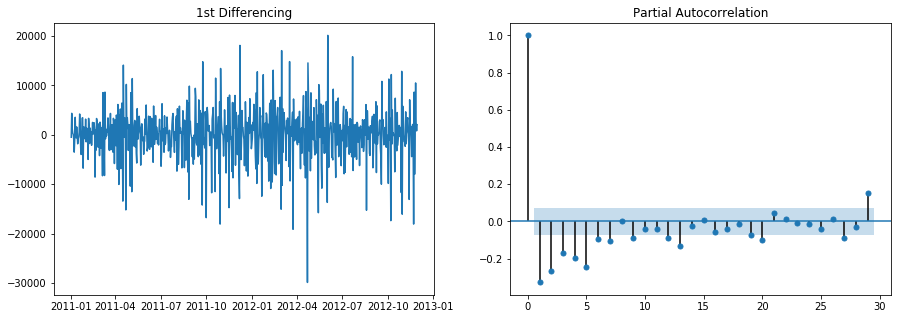

In [76]:
# 1st Differencing PACF Plot
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(temp_df['total_users'].diff()); 
axes[0].set_title('1st Differencing')
plot_pacf(temp_df['total_users'].diff().dropna(), ax=axes[1])

plt.show()

We can observe that the PACF has a lag of 1, we can see that this is well above the line. So we can fix our p at 1.

In [77]:
model = ARIMA(temp_df['total_users'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.total_users   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6857.024
Method:                       css-mle   S.D. of innovations           4465.242
Date:                Sun, 26 Apr 2020   AIC                          13722.049
Time:                        16:15:16   BIC                          13740.242
Sample:                    01-02-2011   HQIC                         13729.082
                         - 11-29-2012                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.2476     24.926      1.133      0.257     -20.607      77.102
ar.L1.D.total_users     0.2862      0.042      6.736      0.000       0.203       0.369
ma.L1.D.total_us

Looking at P>|z|, we have achieve a good p, d, and q value as we can see that the value is below 5%. Using the model, we can plot to see the residual and frequency plot.

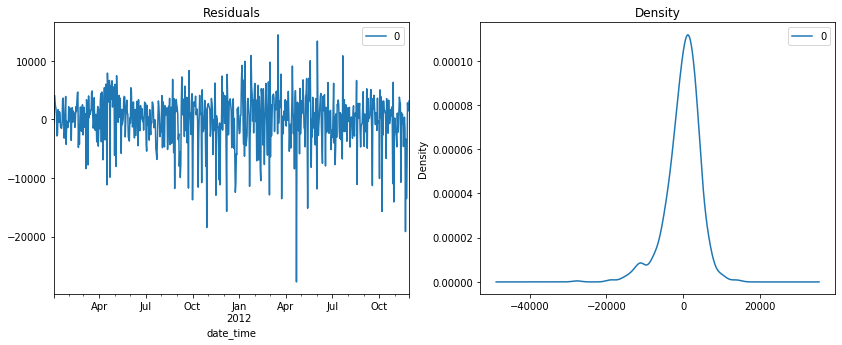

In [78]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(14,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

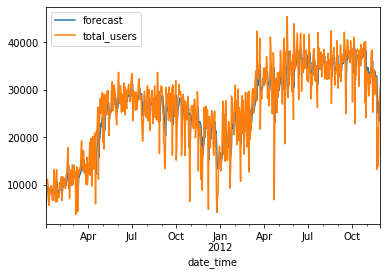

In [79]:
# Actual vs Fitted
model_fit.plot_predict()
plt.show()

### Out of Sample Prediction

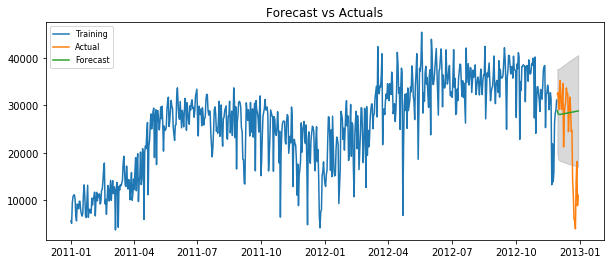

In [80]:
model = ARIMA(y_day_train, order=(1, 1, 1), freq='D')
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(31, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=y_day_test.index)
lower_series = pd.Series(conf[:, 0], index=y_day_test.index)
upper_series = pd.Series(conf[:, 1], index=y_day_test.index)

# Plot
plt.figure(figsize=(10,4))
plt.plot(y_day_train, label='Training')
plt.plot(y_day_test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     28.21
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.07e-05
Time:                        16:15:17   Log-Likelihood:                -203.25
No. Observations:                  31   AIC:                             410.5
Df Residuals:                      29   BIC:                             413.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.887e+04     85.319    338.404      

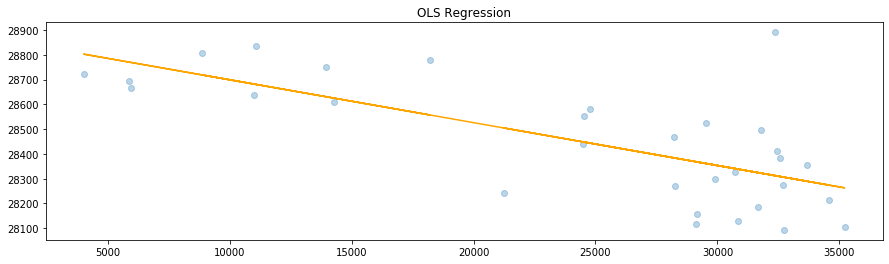

In [81]:
ols_test(y_day_test, fc_series)

The result shown is very poor, especially when the gradient is negative. Need to check time series decomposition for trend and seasonality, as the straight line indicates the mean without the trend or seasonal effect. If we can includes trend or seasonal effect, then we may be able to achieve a more complex predictions rather than a straight line. As this is not the focus of this project, we will be moving onwards to training the ML model.

# XGBoost

In [82]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV

In [83]:
# Define the model
xgb = XGBRegressor(random_state=46)

# Fit the model
xgb.fit(X_train, y_train, eval_metric=['rmse', 'mae'], 
        eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Make predictions
preds = xgb.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2698.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          2.42e-249
Time:                        16:15:18   Log-Likelihood:                -5469.8
No. Observations:                 744   AIC:                         1.094e+04
Df Residuals:                     742   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         266.6884     20.948     12.731      

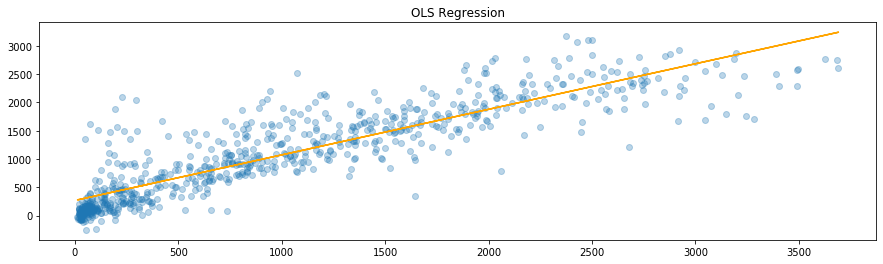

In [84]:
# Validating Initial Model
ols_test(y_test, preds, test=True)

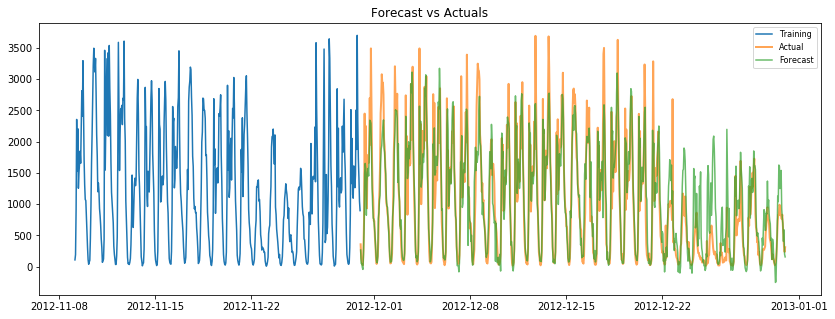

In [85]:
preds_df = pd.DataFrame(preds, index=X_test.index)
plt.figure(figsize=(14,5))
plt.plot(y_train.iloc[-500:,], label='Training')
plt.plot(y_test, label='Actual', alpha=0.7, linewidth=2)
plt.plot(preds_df, label='Forecast', alpha=0.7)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [86]:
# Define the model
xgb = XGBRegressor(n_estimators=100, random_state=46)

# Fit the model
xgb.fit(X_train, y_train, eval_metric=['rmse', 'mae'], 
        eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Make predictions
preds = xgb.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2698.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          2.42e-249
Time:                        16:15:19   Log-Likelihood:                -5469.8
No. Observations:                 744   AIC:                         1.094e+04
Df Residuals:                     742   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         266.6884     20.948     12.731      

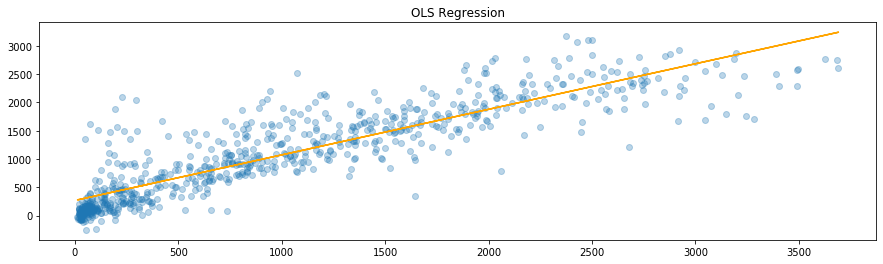

In [87]:
# Validating Model
ols_test(y_test, preds, test=True)

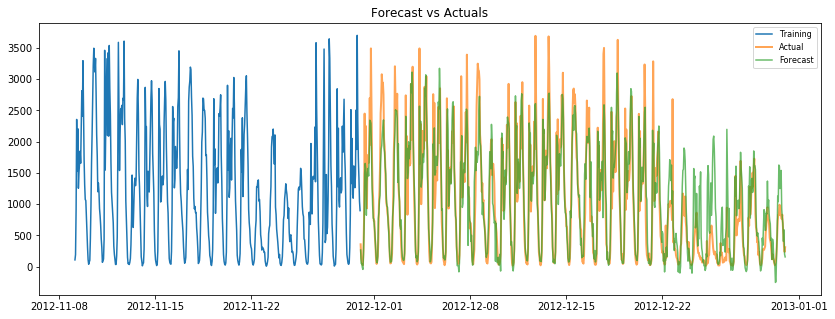

In [88]:
preds_df = pd.DataFrame(preds, index=X_test.index)
plt.figure(figsize=(14,5))
plt.plot(y_train.iloc[-500:,], label='Training')
plt.plot(y_test, label='Actual', alpha=0.7, linewidth=2)
plt.plot(preds_df, label='Forecast', alpha=0.7)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [89]:
# The parameters used are collected from hyperopt
# As it is not significantly higher and that it takes up too much time, I have removed it.
xgb = XGBRegressor(gamma=4.276463026263103, learning_rate=0.03257744196927718, 
                   max_depth=6, min_child_weight=0.32521429145943737,
                   n_estimators=1200, reg_alpha=2.43681120037555, 
                   subsample=0.9751697434523111, random_state=46)

# Fit the model
xgb.fit(X_train, y_train, eval_metric=['rmse', 'mae'], 
        eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Make predictions
preds = xgb.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     2946.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          1.39e-260
Time:                        16:15:27   Log-Likelihood:                -5431.7
No. Observations:                 744   AIC:                         1.087e+04
Df Residuals:                     742   BIC:                         1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         277.1910     19.900     13.929      

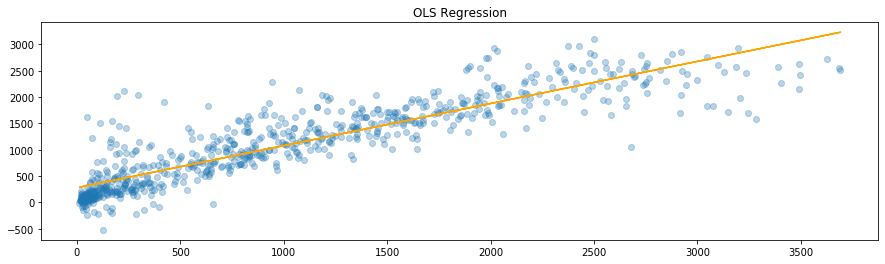

In [90]:
# Validating Model
ols_test(y_test, preds, test=True)

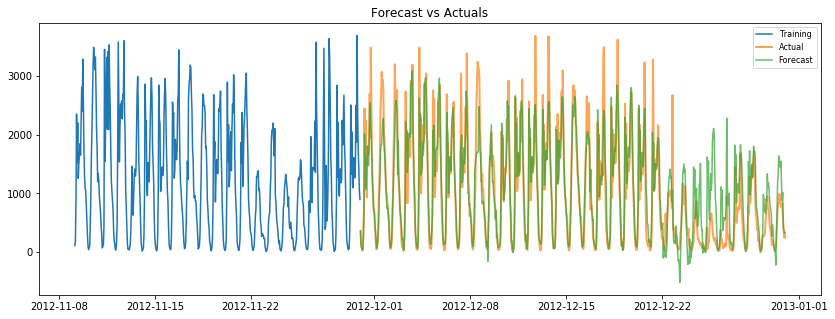

In [91]:
preds_df = pd.DataFrame(preds, index=X_test.index)
plt.figure(figsize=(14,5))
plt.plot(y_train.iloc[-500:,], label='Training')
plt.plot(y_test, label='Actual', alpha=0.7, linewidth=2)
plt.plot(preds_df, label='Forecast', alpha=0.7)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=8)
plt.show()

# Out of Sample Forecast

To predict for the year 2013, we need to have a fake or dummy X_train. Firstly, we need to create the data frame and fill them with values. The method used previously will not work here, as we used a weighted average from the past, the data will keep going higher. Since this is the case, we will fill the missing values with the average from 2011 and 2012 at the same timing with the weighted average. 

In [92]:
# Create dummy X_train to forecast future data
temp_df = pd.DataFrame({'date_time': pd.date_range('2011-01-01', '2013-12-31', freq='1H', closed='left')})
data = pd.merge(temp_df, data, how='left', on='date_time')
data['date_time'] = pd.to_datetime(data['date_time'])

In [93]:
# Preview missing values
data.tail()

date_time  hr  day  mth  yr  wkday_num  weather_num  \
26275 2013-12-30 19:00:00 NaN  NaN  NaN NaN        NaN          NaN   
26276 2013-12-30 20:00:00 NaN  NaN  NaN NaN        NaN          NaN   
26277 2013-12-30 21:00:00 NaN  NaN  NaN NaN        NaN          NaN   
26278 2013-12-30 22:00:00 NaN  NaN  NaN NaN        NaN          NaN   
26279 2013-12-30 23:00:00 NaN  NaN  NaN NaN        NaN          NaN   

       temperature  relative_humidity  windspeed  psi  total_users  
26275          NaN                NaN        NaN  NaN          NaN  
26276          NaN                NaN        NaN  NaN          NaN  
26277          NaN                NaN        NaN  NaN          NaN  
26278          NaN                NaN        NaN  NaN          NaN  
26279          NaN                NaN        NaN  NaN          NaN

In [94]:
def dummy_X_filler(df, col, x=0):
    for index, row in df.iterrows():
        if(pd.isnull(row[col])):
            counter = (df.loc[index-(24*365), col] * 2) + df.loc[index-(24*365*2), col]
            df.loc[index, col] = round(counter/3, x)

In [95]:
# Fill missing values
dummy_X_filler(data, 'weather_num')
dummy_X_filler(data, 'temperature', x=1)
dummy_X_filler(data, 'relative_humidity')
dummy_X_filler(data, 'windspeed')
dummy_X_filler(data, 'psi')
dummy_X_filler(data, 'total_users')

In [96]:
# Filling the missing values
data.index = data['date_time']
data['hr'] = data.index.hour
data['day'] = data.index.day
data['mth'] = data.index.month
data['yr'] = data.index.year
data['wkday_num'] = data.index.dayofweek
del data['date_time']

In [97]:
# Prepare X_test and y_test
data = data['2013-01-01' :'2013-12-31']
X_test = data.drop('total_users', axis=1)
y_test = data['total_users']

In [98]:
# Predict 2013 data
preds = xgb.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 2.427e+04
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:15:56   Log-Likelihood:                -66265.
No. Observations:                8736   AIC:                         1.325e+05
Df Residuals:                    8734   BIC:                         1.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         262.6610      8.509     30.868      

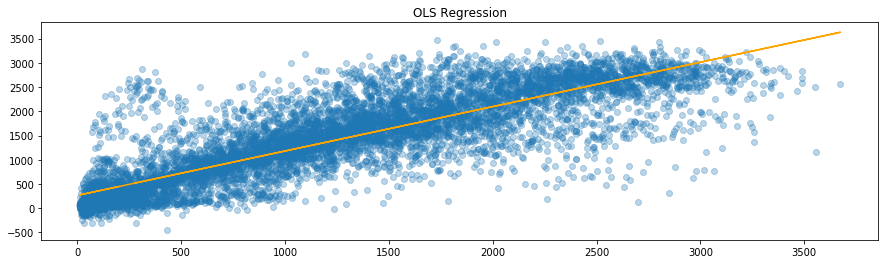

In [99]:
# Validating Model
ols_test(y_test, preds, test=True)

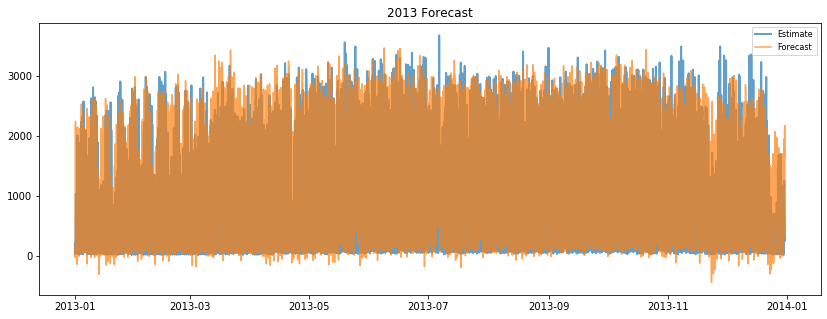

In [100]:
preds_df = pd.DataFrame(preds, index=X_test.index)
plt.figure(figsize=(14,5))
plt.plot(y_test, label='Estimate', alpha=0.7, linewidth=2)
plt.plot(preds_df, label='Forecast', alpha=0.7)
plt.title('2013 Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

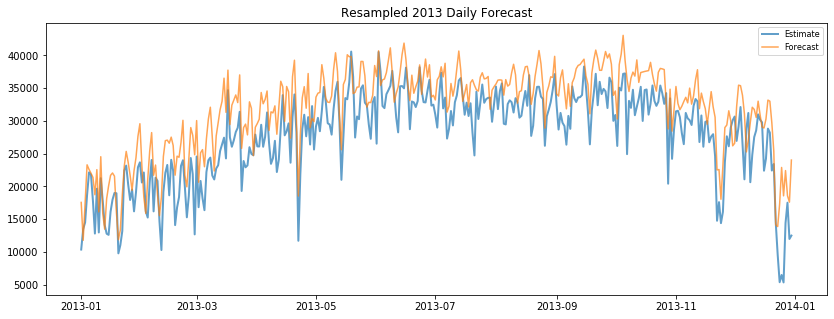

In [101]:
preds_df = pd.DataFrame(preds, index=X_test.index).resample('d').sum()
temp_df = y_test.resample('d').sum()
plt.figure(figsize=(14,5))
plt.plot(temp_df, label='Estimate', alpha=0.7, linewidth=2)
plt.plot(preds_df, label='Forecast', alpha=0.7)
plt.title('Resampled 2013 Daily Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

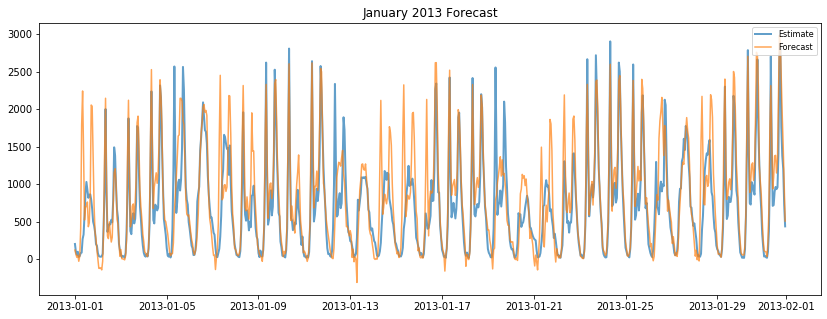

In [102]:
preds_df = pd.DataFrame(preds, index=X_test.index)
plt.figure(figsize=(14,5))
plt.plot(y_test.iloc[:24*31,], label='Estimate', alpha=0.7, linewidth=2)
plt.plot(preds_df.iloc[:24*31,], label='Forecast', alpha=0.7)
plt.title('January 2013 Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

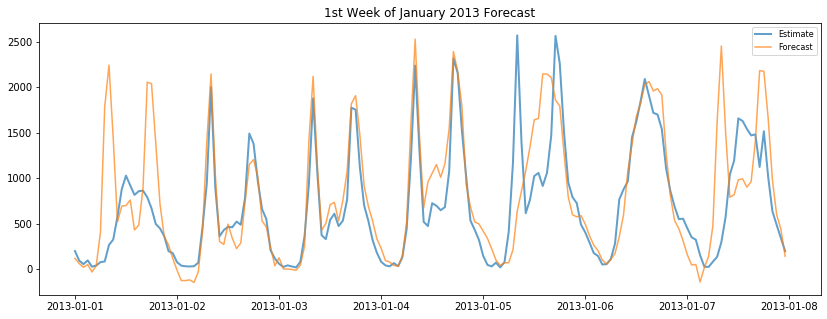

In [103]:
preds_df = pd.DataFrame(preds, index=X_test.index)
plt.figure(figsize=(14,5))
plt.plot(y_test.iloc[:24*7,], label='Estimate', alpha=0.7, linewidth=2)
plt.plot(preds_df.iloc[:24*7,], label='Forecast', alpha=0.7)
plt.title('1st Week of January 2013 Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()